In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = True

### EDA

In [ ]:
df = pd.read_csv('합천다목적댐_수정.csv')
df.head()

,댐이름,시간,발전량(실적),발전량(계획),발전량(계획대비),연간발전계획,연간계획대비,전일유입량,저수위(전년),저수량(전년),...,저수량(예년),예년누계강우량,강우량전일,금년누계강우량,현재저수율,수계,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일
0,합천,1997-01-29 23:00:00,0.0,0.0,0.0,0.0,0.0,1.7,148.88,246.6,...,277.6,39.6,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
1,합천,1997-01-30 11:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
2,합천,1997-01-30 12:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
3,합천,1997-01-30 14:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
4,합천,1997-01-30 15:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228553 entries, 0 to 228552
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   댐이름         228553 non-null  object 
 1   시간          228553 non-null  object 
 2   발전량(실적)     228553 non-null  float64
 3   발전량(계획)     228553 non-null  float64
 4   발전량(계획대비)   228553 non-null  float64
 5   연간발전계획      228553 non-null  float64
 6   연간계획대비      228553 non-null  float64
 7   전일유입량       228553 non-null  float64
 8   저수위(전년)     228553 non-null  float64
 9   저수량(전년)     228553 non-null  float64
 10  저수위(현재)     228553 non-null  float64
 11  저수량(현재)     228553 non-null  float64
 12  저수위(예년)     228553 non-null  float64
 13  저수량(예년)     228553 non-null  float64
 14  예년누계강우량     228553 non-null  float64
 15  강우량전일       228553 non-null  float64
 16  금년누계강우량     228553 non-null  float64
 17  현재저수율       228553 non-null  float64
 18  수계          228553 non-null  object 
 19  전일

In [ ]:
df['시간'] = pd.to_datetime(df['시간'])
df.sort_values('시간', inplace = True)
df.reset_index(drop=True, inplace=True)

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True

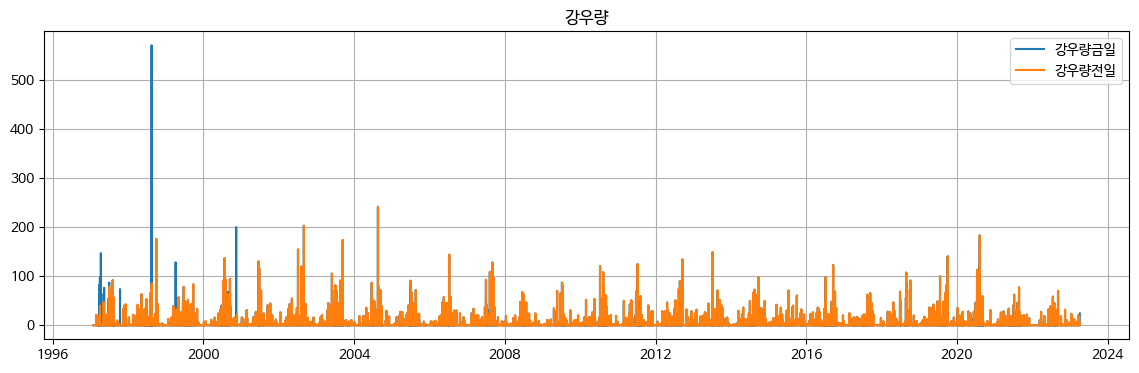

In [ ]:
plt.plot(df['강우량금일'], label='금일')
plt.plot(df['강우량전일'], label='전일')
plt.title('강우량')
plt.legend(['강우량금일','강우량전일'])
plt.show()

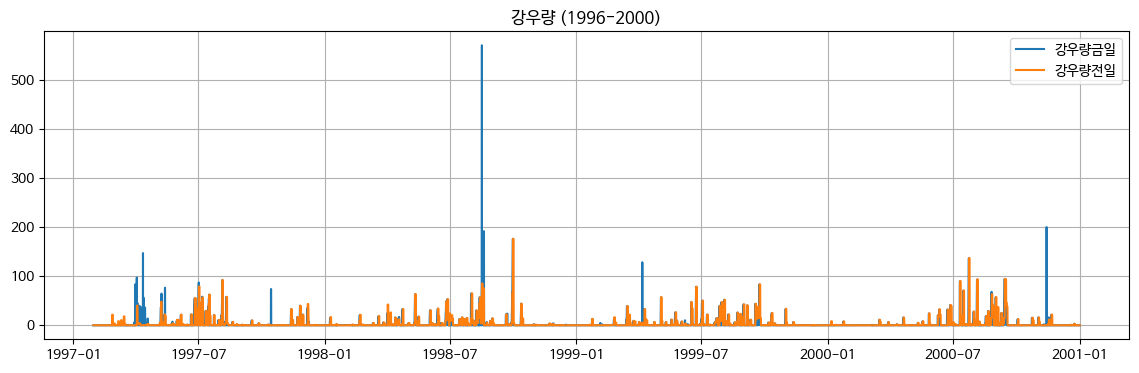

In [ ]:
plt.plot(df[df.index.year <= 2000]['강우량금일'])
plt.plot(df[df.index.year <= 2000]['강우량전일'])
plt.title('강우량 (1996-2000)')
plt.legend(['강우량금일','강우량전일'])
plt.show()

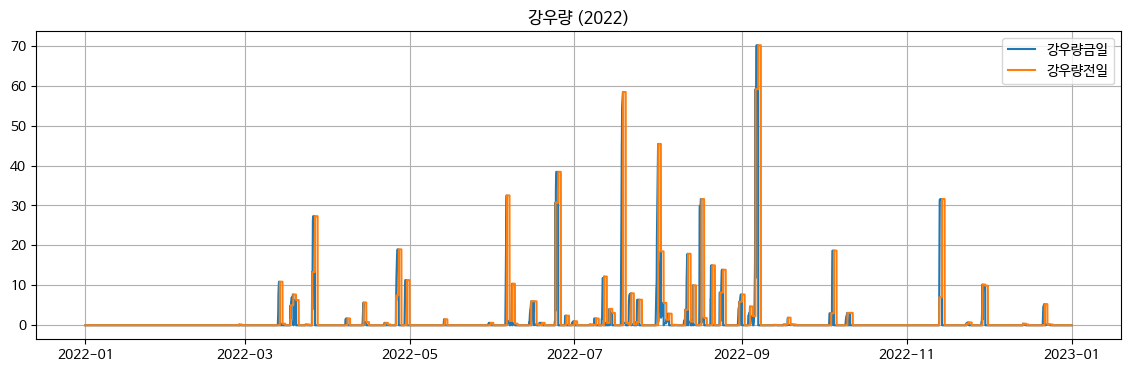

In [ ]:
plt.plot(df[df.index.year == 2022]['강우량금일'])
plt.plot(df[df.index.year == 2022]['강우량전일'])
plt.title('강우량 (2022)')
plt.legend(['강우량금일','강우량전일'])
plt.show()

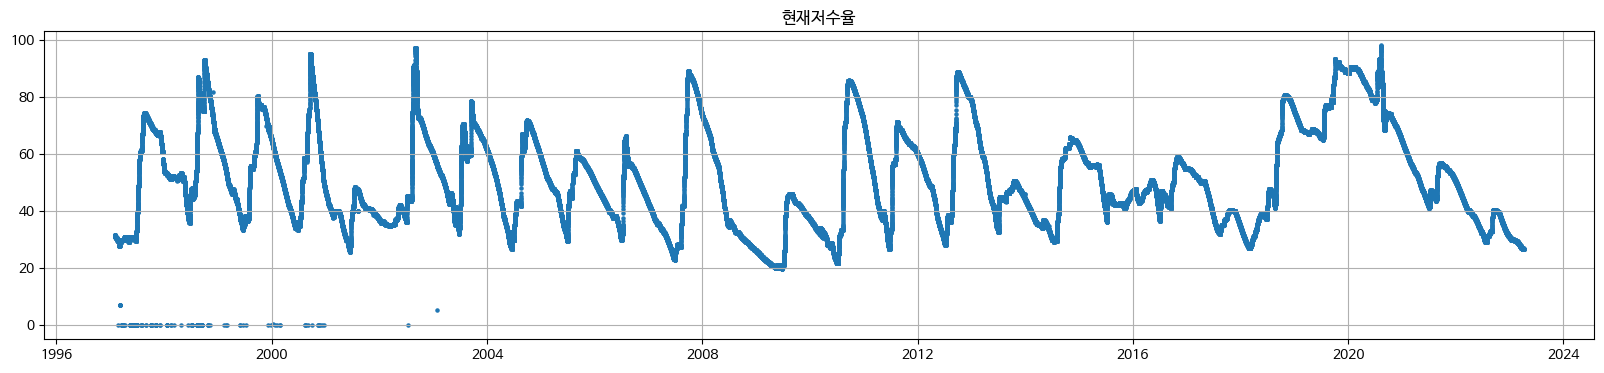

In [ ]:
plt.rcParams["figure.figsize"] = (20,4)
plt.scatter(df.index, df['현재저수율'], s=5)
plt.title('현재저수율')

# plt.plot(df['현재저수율'])
# plt.title('현재저수율')
# plt.show()

plt.show()

#2019년에 저수율이 충분히 안 떨어짐

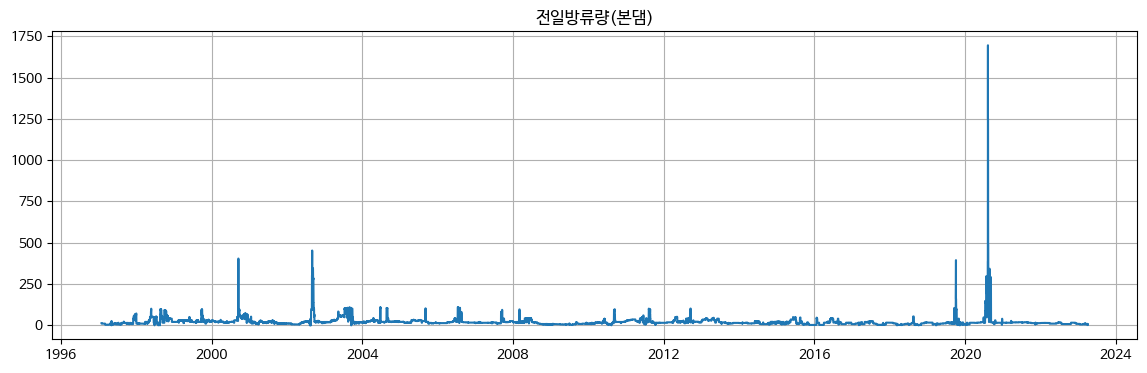

In [ ]:
plt.plot(df['전일방류량(본댐)'])
plt.title('전일방류량(본댐)')
plt.show()

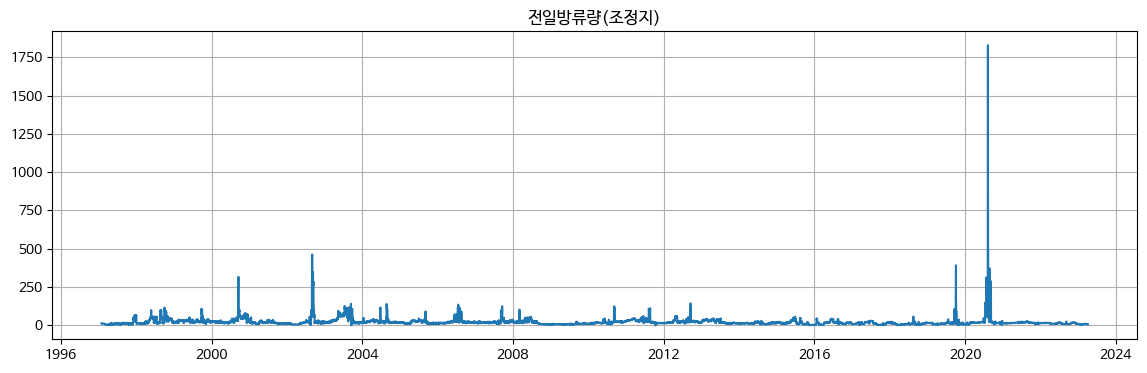

In [ ]:
plt.plot(df['전일방류량(조정지)'])
plt.title('전일방류량(조정지)')
plt.show()

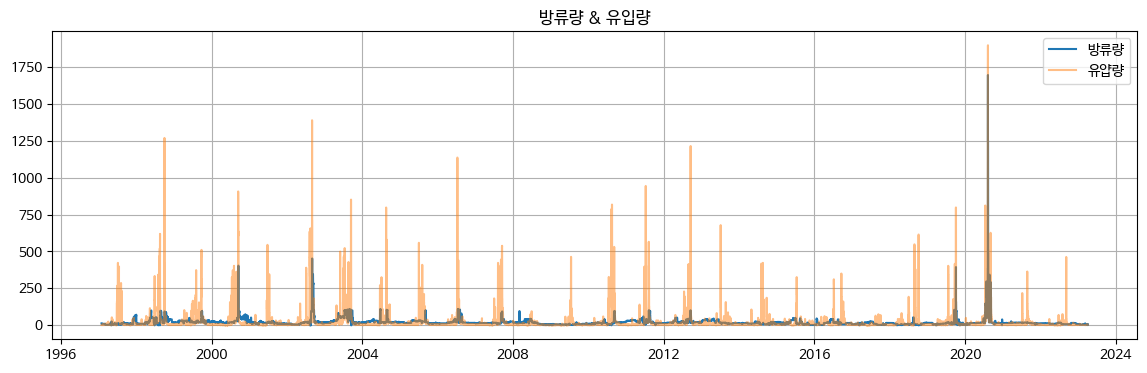

In [ ]:
plt.plot(df['전일방류량(본댐)'])
plt.plot(df['전일유입량'], alpha=0.5)
plt.title('방류량 & 유입량')
plt.legend(['방류량', '유얍량'])
plt.show()

#유입량이 많다고 방류량이 반드시 그만큼 오르진 않음

### 연별누계강우량

- 금년누계강우량: 1월2일~12월31일
- 예년&전년누계강우량: 1월1일~12월30일

In [ ]:
df.set_index('시간', drop=True, inplace=True)
df_acc = df[(pd.DatetimeIndex(df.index).month == 12) & (pd.DatetimeIndex(df.index).day == 30) & (pd.DatetimeIndex(df.index).hour == 23)]

In [ ]:
df_acc = df_acc.loc[:,['예년누계강우량', '금년누계강우량', '전년누계강우량']]

In [ ]:
df_acc

,예년누계강우량,금년누계강우량,전년누계강우량
시간,,,
1997-12-30 23:00:00,1248.8,1248.8,1010.7
1998-12-30 23:00:00,1245.4,1646.6,1248.8
1999-12-30 23:00:00,1288.6,1491.6,1646.6
2000-12-30 23:00:00,1304.1,1552.1,1491.6
2001-12-30 23:00:00,1327.7,1107.3,1552.1
2002-12-30 23:00:00,1308.7,1700.5,1107.3
2003-12-30 23:00:00,1337.1,1895.4,1700.6
2004-12-30 23:00:00,1374.0,1444.0,1895.4
2005-12-30 23:00:00,1379.7,1124.9,1444.0


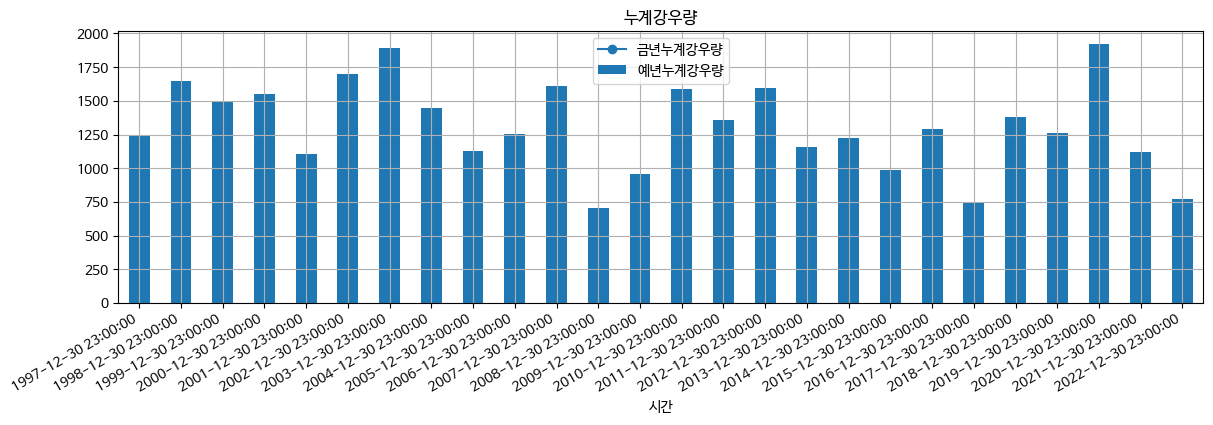

In [ ]:
#fig = plt.figure(figsize=(14,4))
#ax1 = fig.add_subplot()

df_acc['금년누계강우량'].plot.bar() # -> bar
df_acc['예년누계강우량'].plot(marker='o')

#plt.bar(df_acc.index, df_acc['금년누계강우량'])
#plt.plot(df_acc.index, df_acc['예년누계강우량'], marker='o')
plt.legend(['금년누계강우량','예년누계강우량'])
plt.title('누계강우량')
plt.show()

In [ ]:
df[df.index.year == 2012].loc[:,['예년누계강우량', '금년누계강우량', '전년누계강우량']]

,예년누계강우량,금년누계강우량,전년누계강우량
시간,,,
2012-01-01 00:00:00,0.3,1360.9,0.0
2012-01-01 01:00:00,0.3,1360.9,0.0
2012-01-01 02:00:00,0.3,1360.9,0.0
2012-01-01 03:00:00,0.3,1360.9,0.0
2012-01-01 04:00:00,0.3,1360.9,0.0
...,...,...,...
2012-12-31 19:00:00,0.3,1592.8,0.0
2012-12-31 20:00:00,0.3,1592.8,0.0
2012-12-31 21:00:00,0.3,1592.8,0.0


## 데이터셋 정리
- 사용하지 않는 열 삭제
  - 발전량 관련 열
  - 저수위 관련 열
  - 댐 이름, 수계
- 결측치 보간
  - ffill()
  - 선형 보간법
- 2000년 이전 데이터 삭제

In [ ]:
df = pd.read_csv('합천다목적댐_수정.csv')
df['시간'] = pd.to_datetime(df['시간'])
df.sort_values('시간', inplace = True)
df.reset_index(drop=True, inplace=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,댐이름,시간,발전량(실적),발전량(계획),발전량(계획대비),연간발전계획,연간계획대비,전일유입량,저수위(전년),저수량(전년),...,저수량(예년),예년누계강우량,강우량전일,금년누계강우량,현재저수율,수계,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일
0,합천,1997-01-29 23:00:00,0.0,0.0,0.0,0.0,0.0,1.7,148.88,246.6,...,277.6,39.6,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
1,합천,1997-01-30 11:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
2,합천,1997-01-30 12:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
3,합천,1997-01-30 14:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
4,합천,1997-01-30 15:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228553 entries, 0 to 228552
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   댐이름         228553 non-null  object        
 1   시간          228553 non-null  datetime64[ns]
 2   발전량(실적)     228553 non-null  float64       
 3   발전량(계획)     228553 non-null  float64       
 4   발전량(계획대비)   228553 non-null  float64       
 5   연간발전계획      228553 non-null  float64       
 6   연간계획대비      228553 non-null  float64       
 7   전일유입량       228553 non-null  float64       
 8   저수위(전년)     228553 non-null  float64       
 9   저수량(전년)     228553 non-null  float64       
 10  저수위(현재)     228553 non-null  float64       
 11  저수량(현재)     228553 non-null  float64       
 12  저수위(예년)     228553 non-null  float64       
 13  저수량(예년)     228553 non-null  float64       
 14  예년누계강우량     228553 non-null  float64       
 15  강우량전일       228553 non-null  float64       
 16  금년

In [ ]:
print(df.댐이름.value_counts())
print(df.수계.value_counts())

합천    228553
Name: 댐이름, dtype: int64
낙동강    228553
Name: 수계, dtype: int64


In [ ]:
df.drop(df.columns[[0, 2, 3, 4, 5, 6, 8, 10, 12, 18]], axis=1, inplace=True)
df.head()

,시간,전일유입량,저수량(전년),저수량(현재),저수량(예년),예년누계강우량,강우량전일,금년누계강우량,현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일
0,1997-01-29 23:00:00,1.7,246.6,250.7,277.6,39.6,0.0,9.8,31.7,13.0,13.0,23.0,0.0
1,1997-01-30 11:00:00,1.8,245.7,250.7,276.6,41.7,0.0,9.8,31.7,13.0,13.0,23.0,0.0
2,1997-01-30 12:00:00,1.8,245.7,250.5,276.6,41.7,0.0,9.8,31.7,13.0,13.0,23.0,0.0
3,1997-01-30 14:00:00,1.8,245.7,250.4,276.6,41.7,0.0,9.8,31.7,13.0,13.0,23.0,0.0
4,1997-01-30 15:00:00,1.8,245.7,250.4,276.6,41.7,0.0,9.8,31.7,13.0,13.0,23.0,0.0


In [ ]:
df.set_index('시간', drop=True, inplace=True)
df = df[['전일유입량', '저수량(전년)', '저수량(현재)', '저수량(예년)', '현재저수율', '전일방류량(본댐)', '전일방류량(조정지)', '전년누계강우량', '금년누계강우량', '예년누계강우량', '강우량전일', '강우량금일']]

### 시간별 데이터셋 보간 -> 합천다목적댐_시간별.csv

continuous: 저수량(현재), 금년누계강우량, 현재저수율, 강우량금일 -> interpolate <br>
discrete -> ffill

In [ ]:
df2 = df.resample('H').asfreq()
df2[['전일유입량', '저수량(전년)', '저수량(예년)', '전년누계강우량', '예년누계강우량', '강우량전일', '전일방류량(본댐)', '전일방류량(조정지)']] = df2[['전일유입량', '저수량(전년)', '저수량(예년)', '전년누계강우량', '예년누계강우량', '강우량전일', '전일방류량(본댐)', '전일방류량(조정지)']].ffill()
df2[['저수량(현재)', '금년누계강우량','현재저수율', '강우량금일']] = df2[['저수량(현재)', '금년누계강우량','현재저수율', '강우량금일']].interpolate()
df2 = df2.round(1)
df2

,전일유입량,저수량(전년),저수량(현재),저수량(예년),현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,금년누계강우량,예년누계강우량,강우량전일,강우량금일
시간,,,,,,,,,,,,
1997-01-29 23:00:00,1.7,246.6,250.7,277.6,31.7,13.0,13.0,23.0,9.8,39.6,0.0,0.0
1997-01-30 00:00:00,1.7,246.6,250.7,277.6,31.7,13.0,13.0,23.0,9.8,39.6,0.0,0.0
1997-01-30 01:00:00,1.7,246.6,250.7,277.6,31.7,13.0,13.0,23.0,9.8,39.6,0.0,0.0
1997-01-30 02:00:00,1.7,246.6,250.7,277.6,31.7,13.0,13.0,23.0,9.8,39.6,0.0,0.0
1997-01-30 03:00:00,1.7,246.6,250.7,277.6,31.7,13.0,13.0,23.0,9.8,39.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05 19:00:00,3.3,316.1,212.4,323.7,26.9,5.0,5.3,71.2,106.5,127.0,6.9,24.2
2023-04-05 20:00:00,3.3,316.1,212.5,323.7,26.9,5.0,5.3,71.2,106.5,127.0,6.9,24.2
2023-04-05 21:00:00,3.3,316.1,212.5,323.7,26.9,5.0,5.3,71.2,106.5,127.0,6.9,24.2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229489 entries, 1997-01-29 23:00:00 to 2023-04-05 23:00:00
Freq: H
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   전일유입량       229489 non-null  float64
 1   저수량(전년)     229489 non-null  float64
 2   저수량(현재)     229489 non-null  float64
 3   저수량(예년)     229489 non-null  float64
 4   현재저수율       229489 non-null  float64
 5   전일방류량(본댐)   229489 non-null  float64
 6   전일방류량(조정지)  229489 non-null  float64
 7   전년누계강우량     229489 non-null  float64
 8   금년누계강우량     229489 non-null  float64
 9   예년누계강우량     229489 non-null  float64
 10  강우량전일       229489 non-null  float64
 11  강우량금일       229489 non-null  float64
dtypes: float64(12)
memory usage: 22.8 MB


In [ ]:
#없었던 날짜들
missing_date = set([i.date() for i in df2.index.difference(df.index)])

In [ ]:
#확인
df2[(df2.index.year==1997)&(df2.index.month==3)]

,전일유입량,저수량(전년),저수량(현재),저수량(예년),현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,금년누계강우량,예년누계강우량,강우량전일,강우량금일
시간,,,,,,,,,,,,
1997-03-01 00:00:00,5.0,219.7,231.2,266.3,29.3,10.0,10.0,23.0,33.2,89.9,0.0,0.0
1997-03-01 01:00:00,3.3,218.9,231.2,255.0,29.3,10.0,10.0,23.0,35.1,90.6,3.8,0.0
1997-03-01 02:00:00,3.3,218.9,231.2,255.0,29.3,10.0,10.0,23.0,35.1,90.6,3.8,0.0
1997-03-01 03:00:00,3.3,218.9,231.2,255.0,29.3,10.0,10.0,23.0,35.1,90.6,3.8,0.0
1997-03-01 04:00:00,3.3,218.9,231.2,255.0,29.3,10.0,10.0,23.0,35.1,90.6,3.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1997-03-31 19:00:00,3.0,220.5,236.8,248.6,30.0,3.0,3.0,157.5,153.3,166.9,0.0,77.8
1997-03-31 20:00:00,3.0,220.5,236.8,248.6,30.0,3.0,3.0,157.5,158.9,166.9,0.0,83.4
1997-03-31 21:00:00,3.0,220.5,236.8,248.6,30.0,3.0,3.0,157.5,158.9,166.9,0.0,83.4


In [ ]:
df2 = df2[df2.index>='2000-01-01']
#df2.to_csv('합천다목적댐_시간별.csv')

### 일별 데이터셋 보간 -> 합천다목적댐_일별.csv

In [ ]:
df3 = df2.resample('D').mean()
df3 = df3.round(1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8496 entries, 2000-01-01 to 2023-04-05
Freq: D
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   전일유입량       8496 non-null   float64
 1   저수량(전년)     8496 non-null   float64
 2   저수량(현재)     8496 non-null   float64
 3   저수량(예년)     8496 non-null   float64
 4   현재저수율       8496 non-null   float64
 5   전일방류량(본댐)   8496 non-null   float64
 6   전일방류량(조정지)  8496 non-null   float64
 7   전년누계강우량     8496 non-null   float64
 8   금년누계강우량     8496 non-null   float64
 9   예년누계강우량     8496 non-null   float64
 10  강우량전일       8496 non-null   float64
 11  강우량금일       8496 non-null   float64
dtypes: float64(12)
memory usage: 862.9 KB


In [ ]:
df3.head()

,전일유입량,저수량(전년),저수량(현재),저수량(예년),현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,금년누계강우량,예년누계강우량,강우량전일,강우량금일
시간,,,,,,,,,,,,
2000-01-01,7.4,508.5,513.4,340.0,65.0,28.9,26.1,0.0,1491.6,0.6,0.0,0.0
2000-01-02,4.4,507.1,512.1,339.1,64.8,23.7,27.4,0.0,0.1,0.6,0.0,0.1
2000-01-03,4.7,505.8,509.8,338.0,64.6,26.1,23.8,0.0,0.2,1.0,0.2,0.0
2000-01-04,3.8,504.3,508.4,337.0,64.4,27.3,26.8,0.0,0.2,1.8,0.0,0.0
2000-01-05,6.1,503.2,506.5,336.1,64.1,25.2,26.1,0.0,1.4,3.5,0.0,1.2


In [ ]:
df3 = df3[df3.index>='2000-01-01']
#df3.to_csv('합천다목적댐_일별.csv')

### EDA (일별데이터)

In [ ]:
df = pd.read_csv('합천다목적댐_전체_일별.csv')

In [ ]:
df.head()

,시간,발전량(실적),발전량(계획),발전량(계획대비),연간발전계획,연간계획대비,전일유입량,저수위(전년),저수량(전년),저수위(현재),...,예년누계강우량,강우량전일,금년누계강우량,현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일,당일유입량,홍수기
0,2000-01-01,0.0,0.0,0.0,0.0,0.0,7.4,166.63,508.5,166.892500,...,0.6,0.0,0.0000,65.000000,28.9,26.1,0.0,0.0000,4.4,0.0
1,2000-01-02,0.0,0.0,0.0,0.0,0.0,4.4,166.55,507.1,166.822500,...,0.6,0.0,0.1000,64.845833,23.7,27.4,0.0,0.1000,4.7,0.0
2,2000-01-03,0.0,0.0,0.0,0.0,0.0,4.7,166.48,505.8,166.699167,...,1.0,0.2,0.2000,64.554167,26.1,23.8,0.0,0.0000,3.8,0.0
3,2000-01-04,0.0,0.0,0.0,0.0,0.0,3.8,166.40,504.3,166.620417,...,1.8,0.0,0.2000,64.354167,27.3,26.8,0.0,0.0000,6.1,0.0
4,2000-01-05,0.0,0.0,0.0,0.0,0.0,6.1,166.34,503.2,166.519583,...,3.5,0.0,1.4375,64.120833,25.2,26.1,0.0,1.2375,8.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시간          8495 non-null   object 
 1   발전량(실적)     8495 non-null   float64
 2   발전량(계획)     8495 non-null   float64
 3   발전량(계획대비)   8495 non-null   float64
 4   연간발전계획      8495 non-null   float64
 5   연간계획대비      8495 non-null   float64
 6   전일유입량       8495 non-null   float64
 7   저수위(전년)     8495 non-null   float64
 8   저수량(전년)     8495 non-null   float64
 9   저수위(현재)     8495 non-null   float64
 10  저수량(현재)     8495 non-null   float64
 11  저수위(예년)     8495 non-null   float64
 12  저수량(예년)     8495 non-null   float64
 13  예년누계강우량     8495 non-null   float64
 14  강우량전일       8495 non-null   float64
 15  금년누계강우량     8495 non-null   float64
 16  현재저수율       8495 non-null   float64
 17  전일방류량(본댐)   8495 non-null   float64
 18  전일방류량(조정지)  8495 non-null   float64
 19  전년누계강우량     8495 non-null  

In [ ]:
df['시간'] = pd.to_datetime(df['시간'])
df.set_index('시간', drop=True, inplace=True)

In [ ]:
df[df.index<='2023-04-03']

,전일유입량,저수량(전년),저수량(현재),저수량(예년),현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,금년누계강우량,예년누계강우량,강우량전일,강우량금일
시간,,,,,,,,,,,,
2000-01-01,7.4,508.5,513.4,340.0,65.0,28.9,26.1,0.0,1491.6,0.6,0.0,0.0
2000-01-02,4.4,507.1,512.1,339.1,64.8,23.7,27.4,0.0,0.1,0.6,0.0,0.1
2000-01-03,4.7,505.8,509.8,338.0,64.6,26.1,23.8,0.0,0.2,1.0,0.2,0.0
2000-01-04,3.8,504.3,508.4,337.0,64.4,27.3,26.8,0.0,0.2,1.8,0.0,0.0
2000-01-05,6.1,503.2,506.5,336.1,64.1,25.2,26.1,0.0,1.4,3.5,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,2.8,318.5,212.9,326.9,26.9,8.5,9.2,71.2,75.4,116.0,0.0,0.0
2023-03-31,2.6,318.3,212.7,326.5,26.9,8.7,7.9,71.2,75.4,117.3,0.0,0.0
2023-04-01,2.7,318.0,212.6,326.0,26.9,1.3,5.2,71.2,75.4,120.1,0.0,0.0


In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True

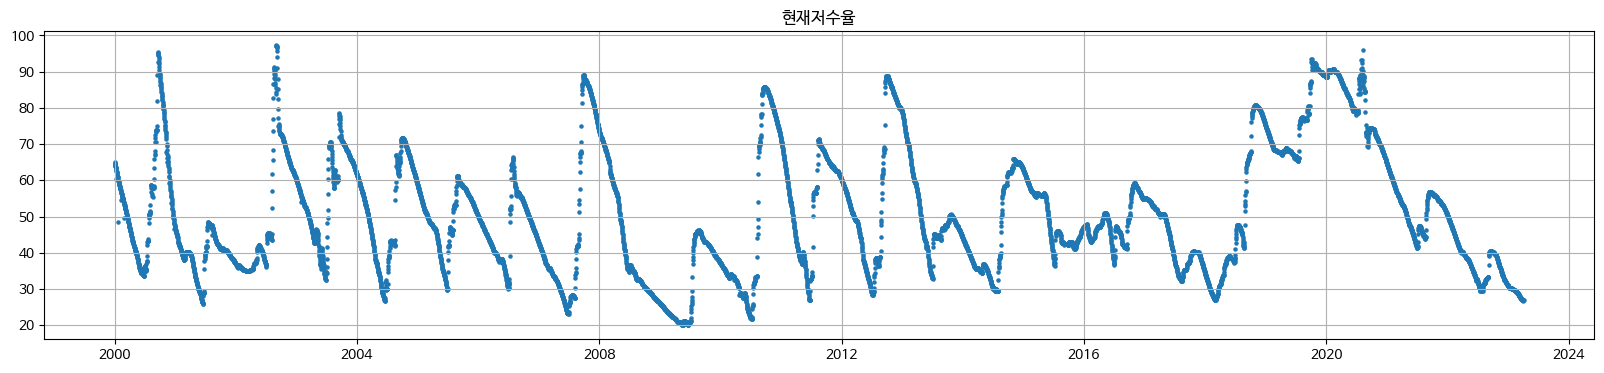

In [ ]:
plt.scatter(df.index, df['현재저수율'], s=5)
plt.title('현재저수율')
plt.show()

#물이 차는 건 홍수기(3개월) 동안이라 빠르고 빠지는 건 갈수기라 느린가?

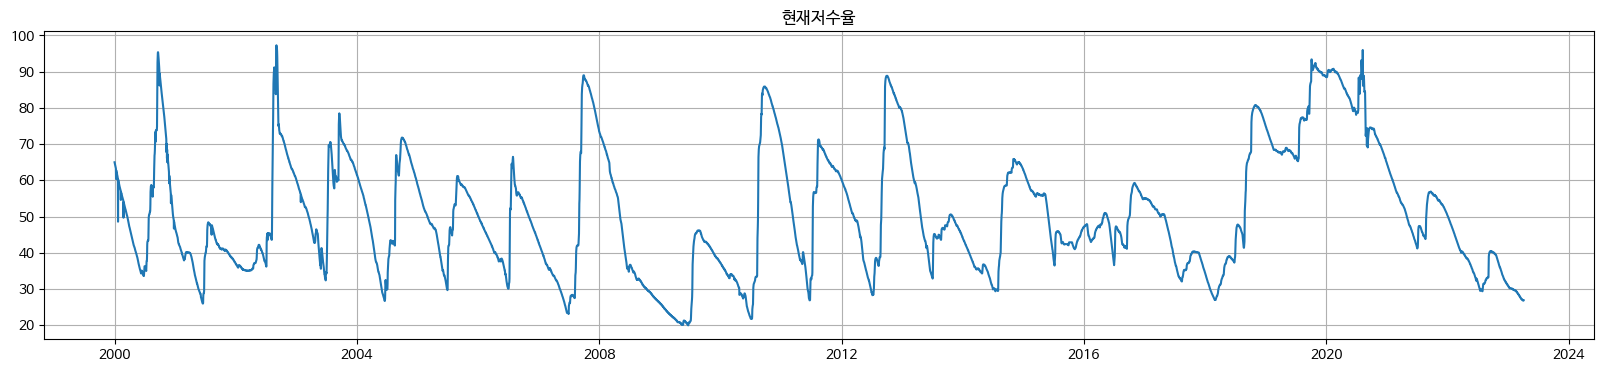

In [ ]:
plt.plot(df['현재저수율'])
plt.title('현재저수율')
plt.show()

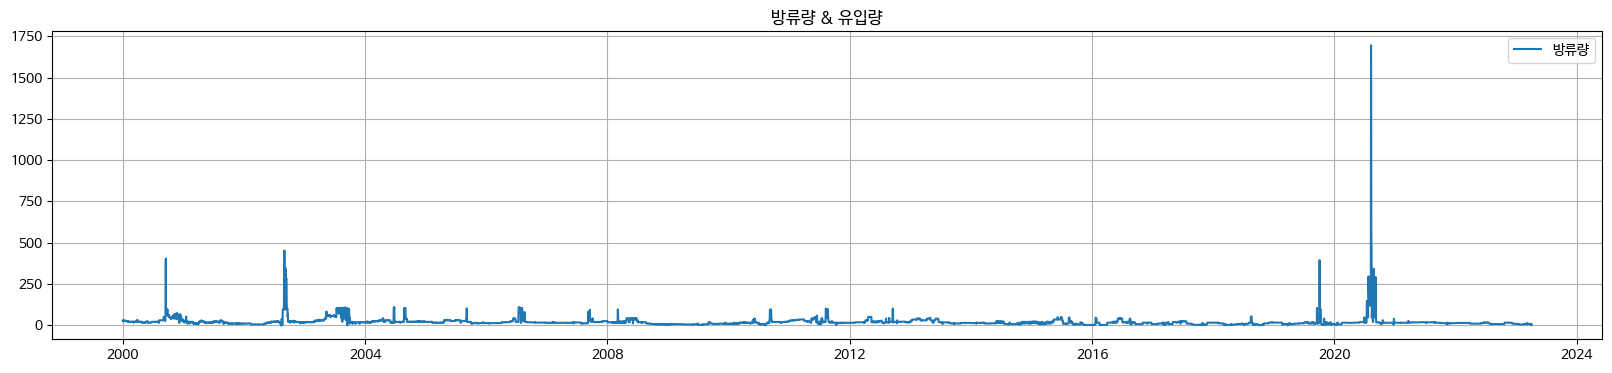

In [ ]:
plt.plot(df['전일방류량(본댐)'])
#plt.plot(df['전일유입량'], alpha=0.5)
#plt.plot(df['강우량전일'])
plt.title('방류량 & 유입량')
plt.legend(['방류량', '유얍량'])
plt.show()

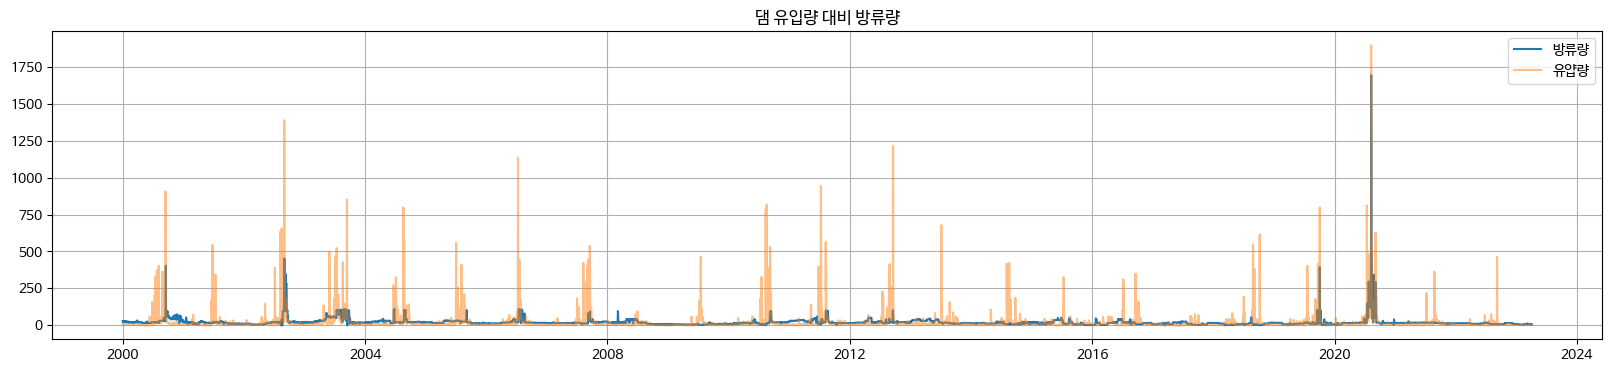

In [ ]:
plt.plot(df['전일방류량(본댐)'])
plt.plot(df['전일유입량'], alpha=0.5)
plt.title('댐 유입량 대비 방류량')
plt.legend(['방류량', '유얍량'])
plt.show()

In [ ]:
np.corrcoef(df['전일유입량'], df['전일방류량(본댐)'])

array([[1.        , 0.43940429],
       [0.43940429, 1.        ]])

In [ ]:
scaled = minmax.fit_transform(df[['전일방류량(본댐)', '전일유입량']])

In [ ]:
scaled = pd.DataFrame(scaled, columns=['전일방류량(본댐)', '전일유입량'])

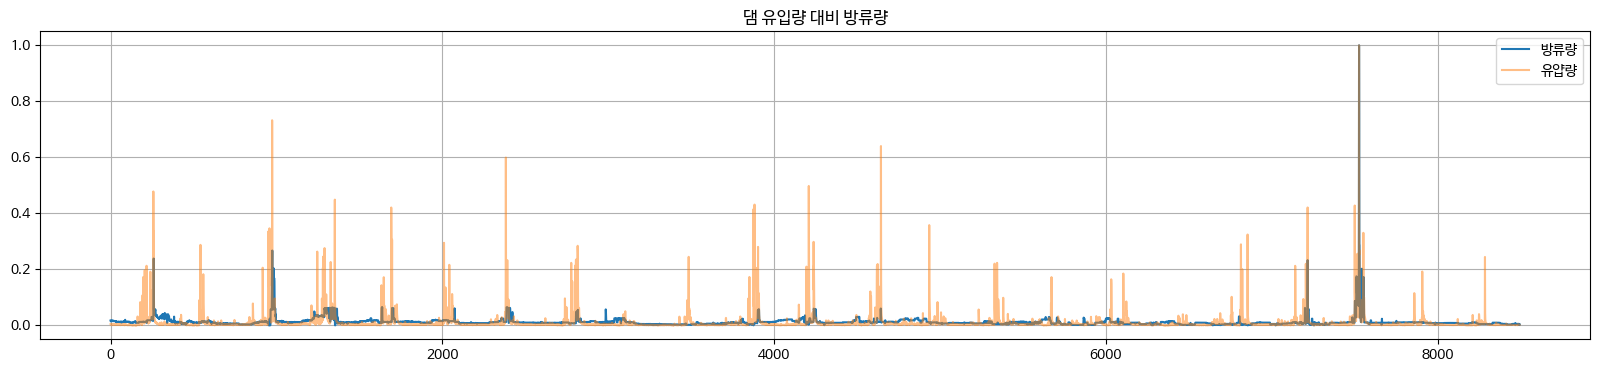

In [ ]:
plt.plot(scaled['전일방류량(본댐)'])
plt.plot(scaled['전일유입량'], alpha=0.5)
plt.title('댐 유입량 대비 방류량')
plt.legend(['방류량', '유얍량'])
plt.show()

### 댐 데이터 정리
- [x] 실시간데이터&강우량 열 삭제
- [x] 2-7일 전 유입량 열 추가
- [ ] 기상 데이터랑 합치기
- [ ] 강우량 대비 유입량 EDA

In [ ]:
df = pd.read_csv('합천다목적댐_전체_일별.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8496 non-null   int64  
 1   시간          8496 non-null   object 
 2   전일유입량       8496 non-null   float64
 3   저수량(전년)     8496 non-null   float64
 4   저수량(현재)     8496 non-null   float64
 5   저수량(예년)     8496 non-null   float64
 6   현재저수율       8496 non-null   float64
 7   전일방류량(본댐)   8496 non-null   float64
 8   전일방류량(조정지)  8496 non-null   float64
 9   전년누계강우량     8496 non-null   float64
 10  금년누계강우량     8496 non-null   float64
 11  예년누계강우량     8496 non-null   float64
 12  강우량전일       8496 non-null   float64
 13  강우량금일       8496 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 929.4+ KB


In [ ]:
#continuous: 저수량(현재), 금년누계강우량, 현재저수율, 강우량금일
df.drop(df.columns[[0, 9, 10, 11, 12, 13]], axis=1, inplace=True)

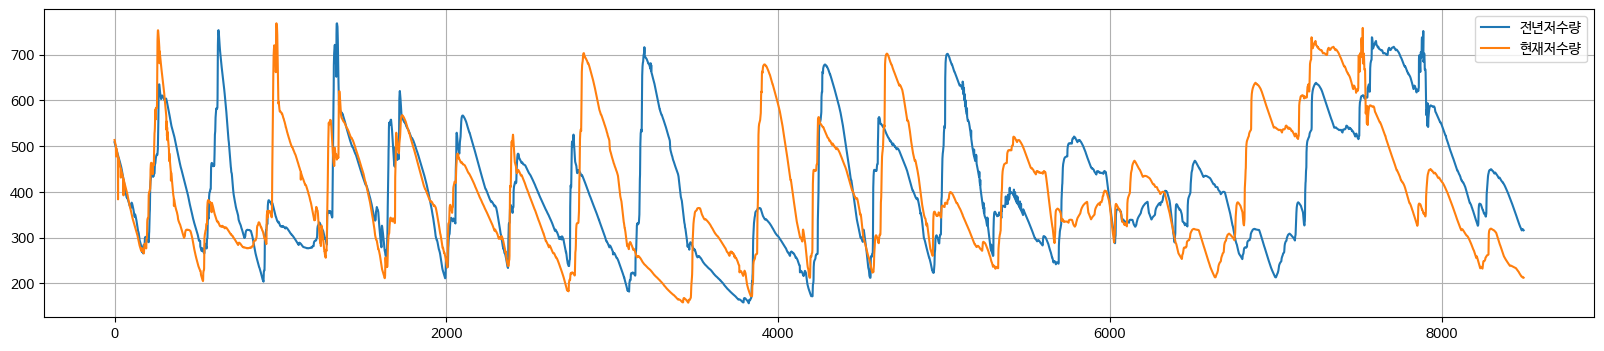

In [ ]:
plt.plot(df['저수량(전년)'])
plt.plot(df['저수량(현재)'])
plt.legend(['전년저수량', '현재저수량'])
plt.show()

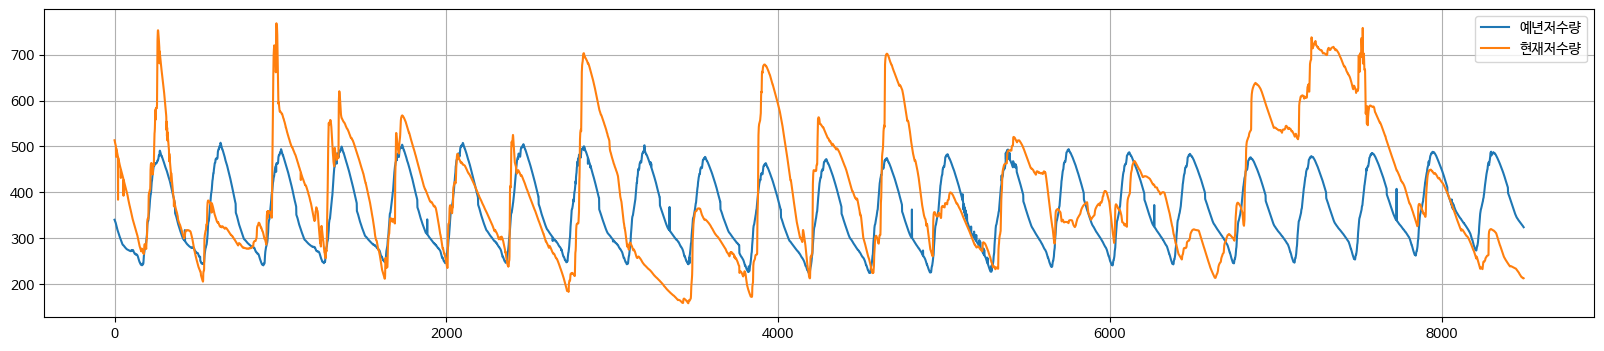

In [ ]:
plt.plot(df['저수량(예년)'])
plt.plot(df['저수량(현재)'])
plt.legend(['예년저수량', '현재저수량'])
plt.show()

In [ ]:
# 전년과의 비교보단 예년과의 비교가 의미있어보임
df['저수량차이'] = df['저수량(현재)'] - df['저수량(예년)']

In [ ]:
df.drop(df.columns[[2, 4, 5]], axis=1, inplace=True)
df.head()

,시간,전일유입량,저수량(현재),전일방류량(본댐),전일방류량(조정지),저수량차이
0,2000-01-01,7.4,513.4,28.9,26.1,173.4
1,2000-01-02,4.4,512.1,23.7,27.4,173.0
2,2000-01-03,4.7,509.8,26.1,23.8,171.8
3,2000-01-04,3.8,508.4,27.3,26.8,171.4
4,2000-01-05,6.1,506.5,25.2,26.1,170.4


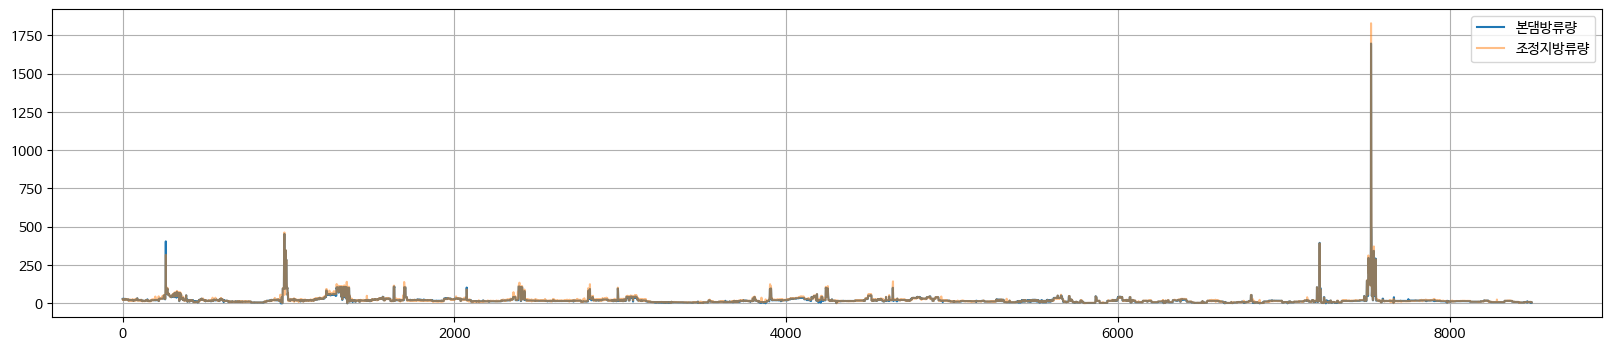

In [ ]:
plt.plot(df['전일방류량(본댐)'])
plt.plot(df['전일방류량(조정지)'], alpha=0.5)
plt.legend(['본댐방류량', '조정지방류량'])
plt.show()

In [ ]:
df.drop('전일방류량(조정지)', axis=1, inplace=True)
df.head()

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이
0,2000-01-01,7.4,513.4,28.9,173.4
1,2000-01-02,4.4,512.1,23.7,173.0
2,2000-01-03,4.7,509.8,26.1,171.8
3,2000-01-04,3.8,508.4,27.3,171.4
4,2000-01-05,6.1,506.5,25.2,170.4


In [ ]:
for i in range(1, 7):
  a = [None for j in range(i)]
  b = [j for j in df['전일유입량'][:-i]]
  a.extend(b)
  df['%d일전유입량' %(i+1)] = a

In [ ]:
df.head(20)

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,4일전유입량,5일전유입량,6일전유입량,7일전유입량
0,2000-01-01,7.4,513.4,28.9,173.4,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,4.4,512.1,23.7,173.0,7.4,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,4.7,509.8,26.1,171.8,4.4,7.4,NaN,NaN,NaN,NaN
3,2000-01-04,3.8,508.4,27.3,171.4,4.7,4.4,7.4,NaN,NaN,NaN
4,2000-01-05,6.1,506.5,25.2,170.4,3.8,4.7,4.4,7.4,NaN,NaN
5,2000-01-06,8.0,505.2,25.0,170.0,6.1,3.8,4.7,4.4,7.4,NaN
6,2000-01-07,6.4,503.4,25.0,169.2,8.0,6.1,3.8,4.7,4.4,7.4
7,2000-01-08,5.9,501.9,24.8,168.8,6.4,8.0,6.1,3.8,4.7,4.4
8,2000-01-09,4.4,500.1,29.6,168.5,5.9,6.4,8.0,6.1,3.8,4.7
9,2000-01-10,5.4,477.4,26.3,147.3,4.4,5.9,6.4,8.0,6.1,3.8


In [ ]:
dfbefore = pd.read_csv('/content/drive/MyDrive/23_1_데사캡스톤/data/원본/댐/합천다목적댐_1997_2023_일별평균값.csv')
toadd = dfbefore[(dfbefore['시간']>='1999-12-26') & (dfbefore['시간']<'2000-01-01')]['전일유입량']

In [ ]:
for i in range(1, 7):
  df['%d일전유입량' %(i+1)][0:i] = toadd.values[-1-i+1:]

<ipython-input-104-ebf7884bed5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%d일전유입량' %(i+1)][0:i] = toadd.values[-1-i+1:]


In [ ]:
df.head(20)

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,4일전유입량,5일전유입량,6일전유입량,7일전유입량
0,2000-01-01,7.4,513.4,28.9,173.4,5.8,3.5,5.5,6.9,5.0,5.3
1,2000-01-02,4.4,512.1,23.7,173.0,7.4,5.8,3.5,5.5,6.9,5.0
2,2000-01-03,4.7,509.8,26.1,171.8,4.4,7.4,5.8,3.5,5.5,6.9
3,2000-01-04,3.8,508.4,27.3,171.4,4.7,4.4,7.4,5.8,3.5,5.5
4,2000-01-05,6.1,506.5,25.2,170.4,3.8,4.7,4.4,7.4,5.8,3.5
5,2000-01-06,8.0,505.2,25.0,170.0,6.1,3.8,4.7,4.4,7.4,5.8
6,2000-01-07,6.4,503.4,25.0,169.2,8.0,6.1,3.8,4.7,4.4,7.4
7,2000-01-08,5.9,501.9,24.8,168.8,6.4,8.0,6.1,3.8,4.7,4.4
8,2000-01-09,4.4,500.1,29.6,168.5,5.9,6.4,8.0,6.1,3.8,4.7
9,2000-01-10,5.4,477.4,26.3,147.3,4.4,5.9,6.4,8.0,6.1,3.8


In [ ]:
df.to_csv('합천다목적댐_일별_0510.csv', index=None)

### 미래 유입량 열 추가

In [ ]:
df =pd.read_csv('합천다목적댐_일별_0510.csv')

In [ ]:
a = []
for i in range(1, 4):
  b = [j for j in df['전일유입량'][i:]]
  a.append(b)

toadd = pd.DataFrame(a, index=['당일유입량', '1일후유입량', '2일후유입량'])
toadd = toadd.transpose()
toadd.loc[8495] = [None, None, None]
toadd

,당일유입량,1일후유입량,2일후유입량
0,4.4,4.7,3.8
1,4.7,3.8,6.1
2,3.8,6.1,8.0
3,6.1,8.0,6.4
4,8.0,6.4,5.9
...,...,...,...
8491,2.3,2.6,3.1
8492,2.6,3.1,3.3
8493,3.1,3.3,NaN
8494,3.3,NaN,NaN


In [ ]:
df = pd.concat([df, toadd], axis=1)
df.tail()

,시간,전일유입량,저수량(현재),전일방류량(본댐),저수량차이,2일전유입량,3일전유입량,4일전유입량,5일전유입량,6일전유입량,7일전유입량,당일유입량,1일후유입량,2일후유입량
8491,2023-04-01,2.7,212.6,1.3,-113.4,2.6,2.8,3.2,3.3,4.6,4.7,2.3,2.6,3.1
8492,2023-04-02,2.3,212.4,5.0,-113.1,2.7,2.6,2.8,3.2,3.3,4.6,2.6,3.1,3.3
8493,2023-04-03,2.6,212.2,5.0,-112.7,2.3,2.7,2.6,2.8,3.2,3.3,3.1,3.3,NaN
8494,2023-04-04,3.1,212.0,5.0,-112.3,2.6,2.3,2.7,2.6,2.8,3.2,3.3,NaN,NaN
8495,2023-04-05,3.3,212.4,5.0,-111.3,3.1,2.6,2.3,2.7,2.6,2.8,NaN,NaN,NaN


In [ ]:
df.interpolate(inplace=True)

In [ ]:
df.to_csv('합천다목적댐_일별_0511.csv', index=None)

## EDA

### 전처리

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

In [5]:
df = pd.read_csv('합천_댐기상종합_전처리.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8495 non-null   object 
 1   전일유입량             8495 non-null   float64
 2   저수위(현재)           8495 non-null   float64
 3   저수량(현재)           8495 non-null   float64
 4   저수위(예년)           8495 non-null   float64
 5   저수량(예년)           8495 non-null   float64
 6   현재저수율             8495 non-null   float64
 7   당일유입량             8495 non-null   float64
 8   홍수기               8495 non-null   float64
 9   저수위변화             8495 non-null   float64
 10  저수량변화             8495 non-null   float64
 11  강우변화              8495 non-null   float64
 12  sin_day_of_week   8495 non-null   float64
 13  cos_day_of_week   8495 non-null   float64
 14  sin_month         8495 non-null   float64
 15  cos_month         8495 non-null   float64
 16  sin_week_of_year  8495 non-null   float64


In [ ]:
df.head()

,Unnamed: 0,전일유입량,저수위(현재),저수량(현재),저수위(예년),저수량(예년),현재저수율,당일유입량,홍수기,저수위변화,...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),최저운고(100m ),시정(10m),지면온도(°C),1일후강수량,2일후강수량
0,2000-01-01,7.4,166.892500,513.350000,155.19,340.0,65.000000,4.4,0.0,11.702500,...,-2.562500,1022.395833,1026.575000,0.229167,0.3,10.00,1593.750000,3.864583,0.000000,0.000000
1,2000-01-02,4.4,166.822500,512.137500,155.13,339.1,64.845833,4.7,0.0,11.692500,...,0.887500,1013.941667,1018.020833,0.087500,0.3,10.00,1329.166667,5.345833,0.000000,0.000000
2,2000-01-03,4.7,166.699167,509.795833,155.06,338.0,64.554167,3.8,0.0,11.639167,...,-7.058333,1016.700000,1020.891667,0.393333,0.3,10.00,1764.583333,2.275000,0.000000,0.187500
3,2000-01-04,3.8,166.620417,508.370833,154.99,337.0,64.354167,6.1,0.0,11.630417,...,-7.879167,1020.979167,1025.204167,0.361667,0.3,10.00,1612.500000,1.862500,0.187500,1.020833
4,2000-01-05,6.1,166.519583,506.537500,154.93,336.1,64.120833,8.0,0.0,11.589583,...,-2.991667,1017.450000,1021.616667,0.061667,0.3,10.75,1283.333333,3.862500,1.020833,0.135417


In [7]:
#scaled data 만들기
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
dfcol = list(df.columns)
dfcol.remove('date')

scaled = minmax.fit_transform(df[dfcol])
df_scaled = pd.DataFrame(scaled, columns=dfcol)
df_scaled['date'] = df['date']

df_scaled.set_index('date', inplace=True)
df_scaled

,전일유입량,저수위(현재),저수량(현재),저수위(예년),저수량(예년),현재저수율,당일유입량,홍수기,저수위변화,저수량변화,...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),최저운고(100m ),시정(10m),지면온도(°C),1일후강수량,2일후강수량
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.003900,0.697832,0.582062,0.400114,0.408659,0.582193,0.002319,0.0,0.735982,0.674350,...,0.428206,0.754355,0.754572,0.254873,0.025974,0.114754,0.310185,0.209110,0.000000,0.000000
2000-01-02,0.002319,0.695974,0.580077,0.396699,0.405491,0.580198,0.002477,0.0,0.735729,0.673865,...,0.498764,0.574031,0.574941,0.097315,0.025974,0.114754,0.256145,0.239237,0.000000,0.000000
2000-01-03,0.002477,0.692701,0.576244,0.392715,0.401619,0.576426,0.002003,0.0,0.734375,0.671939,...,0.336259,0.632865,0.635226,0.437454,0.025974,0.114754,0.345077,0.176780,0.000000,0.005805
2000-01-04,0.002003,0.690610,0.573911,0.388731,0.398099,0.573839,0.003215,0.0,0.734153,0.671279,...,0.319472,0.724138,0.725785,0.402235,0.025974,0.114754,0.314015,0.168390,0.005805,0.031605
2000-01-05,0.003215,0.687934,0.570909,0.385316,0.394931,0.570820,0.004217,0.0,0.733117,0.669831,...,0.419429,0.648862,0.650451,0.068584,0.025974,0.125293,0.246784,0.209068,0.031605,0.004193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.001370,0.150597,0.089927,0.402960,0.361140,0.089361,0.001423,0.0,0.211531,0.228816,...,0.463400,0.580697,0.562779,0.557631,0.017316,0.899883,0.391143,0.506102,0.005905,0.006914
2023-04-01,0.001423,0.150442,0.089750,0.401252,0.359380,0.089361,0.001212,0.0,0.212145,0.229424,...,0.512569,0.555012,0.537667,0.479624,0.017316,0.941194,0.413219,0.497288,0.006914,0.007922
2023-04-02,0.001212,0.149923,0.089429,0.398976,0.357621,0.089361,0.001370,0.0,0.212663,0.229896,...,0.510695,0.618201,0.600140,0.641043,0.017316,0.952716,0.555365,0.494068,0.007922,0.010210


In [ ]:
#2020년 이전 scaled data
scaled2019 = df[df['date']<'2020-01-01']
scaled2019 = minmax.fit_transform(scaled2019[dfcol])
scaled2019 = pd.DataFrame(scaled2019, columns=dfcol)
scaled2019['date'] = df['date']
scaled2019.set_index('date', inplace=True)
scaled2019

### 그래프

In [ ]:
print(dfcol)

['전일유입량', '저수위(현재)', '저수량(현재)', '저수위(예년)', '저수량(예년)', '현재저수율', '당일유입량', '홍수기', '저수위변화', '저수량변화', '강우변화', 'sin_day_of_week', 'cos_day_of_week', 'sin_month', 'cos_month', 'sin_week_of_year', 'cos_week_of_year', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '1일후강수량', '2일후강수량']


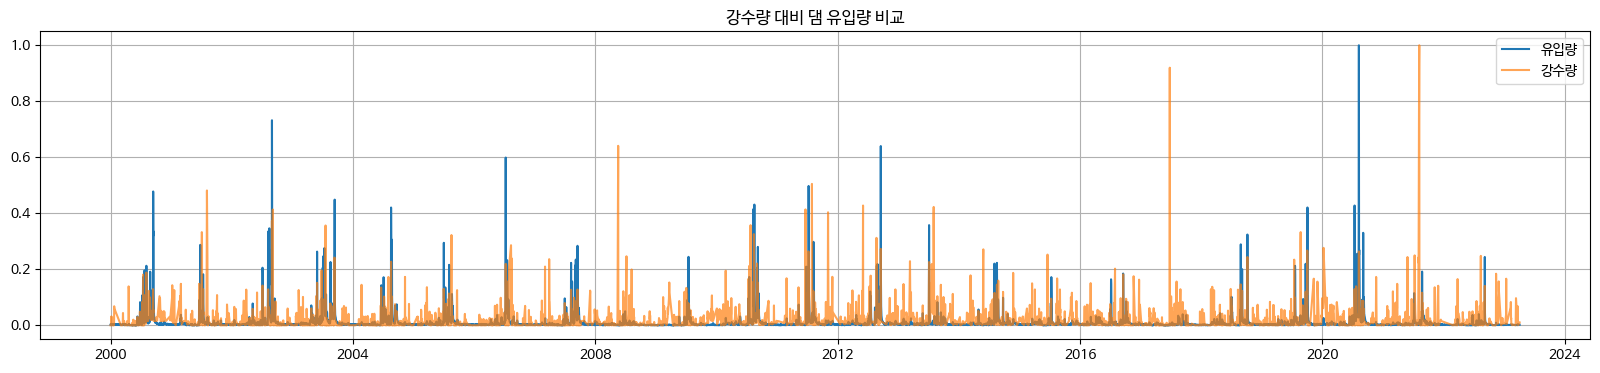

In [ ]:
plt.plot(df_scaled['당일유입량'])
plt.plot(df_scaled['강수량(mm)'], alpha=0.7)

plt.legend(['유입량','강수량'])
plt.title('강수량 대비 댐 유입량 비교')
plt.show()

- 강수량에 비해 유입량이 적은 해 2009, 2017, 2021
- 강수량에 비해 유입량이 많은 해 2012, 2020

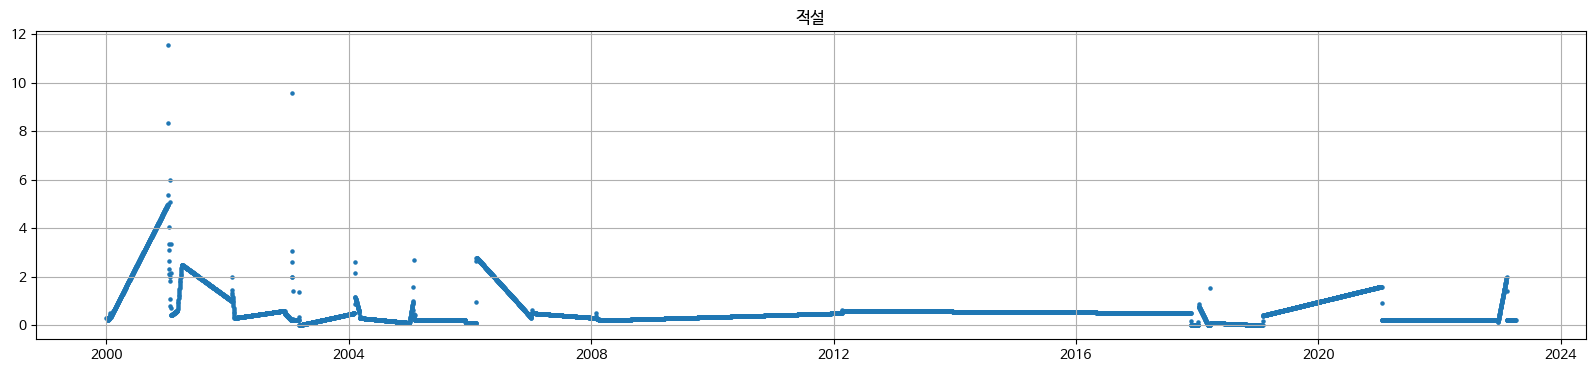

In [ ]:
#plt.bar(df_scaled.index, df_scaled['적설(cm)'])
plt.scatter(df_scaled.index, df['적설(cm)'], s=5)

plt.title('적설')
plt.show()

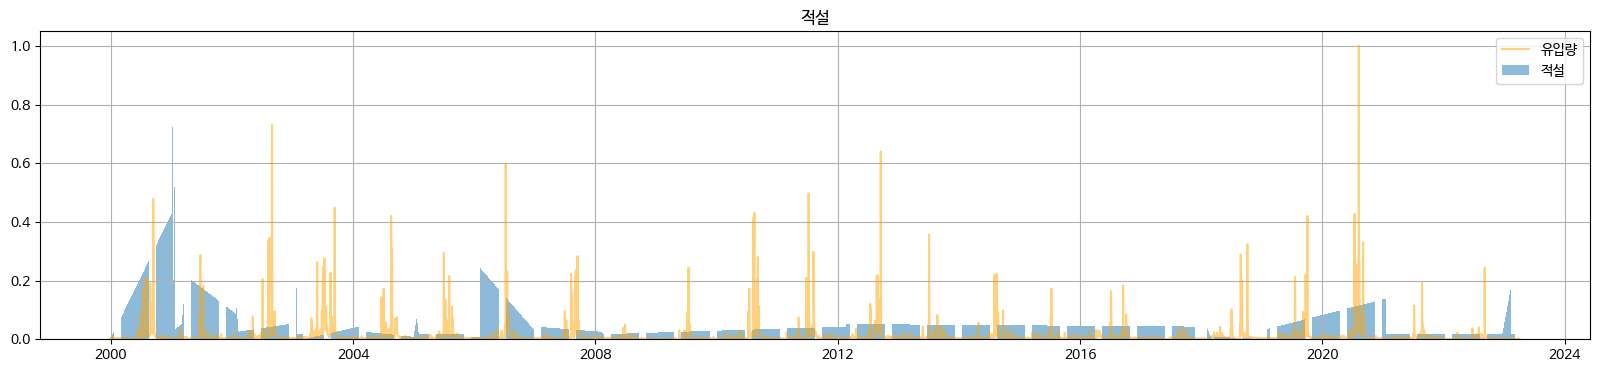

In [15]:
plt.plot(df_scaled['당일유입량'], color='orange', alpha=0.5)
plt.bar(df_scaled.index, df_scaled['적설(cm)'], alpha=0.5)

plt.legend(['유입량','적설'])
plt.title('적설')
plt.show()

In [ ]:
plt.bar(df['date'], df['적설(cm)'])

plt.title('적설')
plt.show()

In [ ]:
df[df.date<'2004-01-01']

,date,전일유입량,저수위(현재),저수량(현재),저수위(예년),저수량(예년),현재저수율,당일유입량,홍수기,저수위변화,...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),최저운고(100m ),시정(10m),지면온도(°C),1일후강수량,2일후강수량
0,2000-01-01,7.4,166.892500,513.350000,155.19,340.0,65.000000,4.4,0.0,11.702500,...,-2.562500,1022.395833,1026.575000,0.229167,0.300000,10.000000,1593.750000,3.864583,0.000000,0.000000
1,2000-01-02,4.4,166.822500,512.137500,155.13,339.1,64.845833,4.7,0.0,11.692500,...,0.887500,1013.941667,1018.020833,0.087500,0.300000,10.000000,1329.166667,5.345833,0.000000,0.000000
2,2000-01-03,4.7,166.699167,509.795833,155.06,338.0,64.554167,3.8,0.0,11.639167,...,-7.058333,1016.700000,1020.891667,0.393333,0.300000,10.000000,1764.583333,2.275000,0.000000,0.187500
3,2000-01-04,3.8,166.620417,508.370833,154.99,337.0,64.354167,6.1,0.0,11.630417,...,-7.879167,1020.979167,1025.204167,0.361667,0.300000,10.000000,1612.500000,1.862500,0.187500,1.020833
4,2000-01-05,6.1,166.519583,506.537500,154.93,336.1,64.120833,8.0,0.0,11.589583,...,-2.991667,1017.450000,1021.616667,0.061667,0.300000,10.750000,1283.333333,3.862500,1.020833,0.135417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2003-12-27,5.5,165.695417,491.666667,158.40,382.3,62.241667,5.5,0.0,7.295417,...,-10.325000,1023.383333,1027.495833,0.354167,0.440948,8.636781,1427.551533,0.370833,0.000000,0.000000
1457,2003-12-28,5.5,165.621250,490.329167,158.29,380.7,62.091667,3.6,0.0,7.331250,...,-6.695833,1026.483333,1030.604167,0.300000,0.442442,8.635685,1426.930396,-0.183333,0.000000,0.000000
1458,2003-12-29,3.6,165.587500,489.754167,158.20,379.3,61.995833,8.5,0.0,7.387500,...,-1.425000,1020.587500,1024.566667,0.158333,0.443936,8.634589,1426.309259,3.950000,0.000000,0.000000
1459,2003-12-30,8.5,165.511250,488.387500,158.10,377.8,61.837500,5.7,0.0,7.411250,...,-3.470833,1020.258333,1024.241667,0.166667,0.445430,8.633493,1425.688122,3.877083,0.000000,0.000000


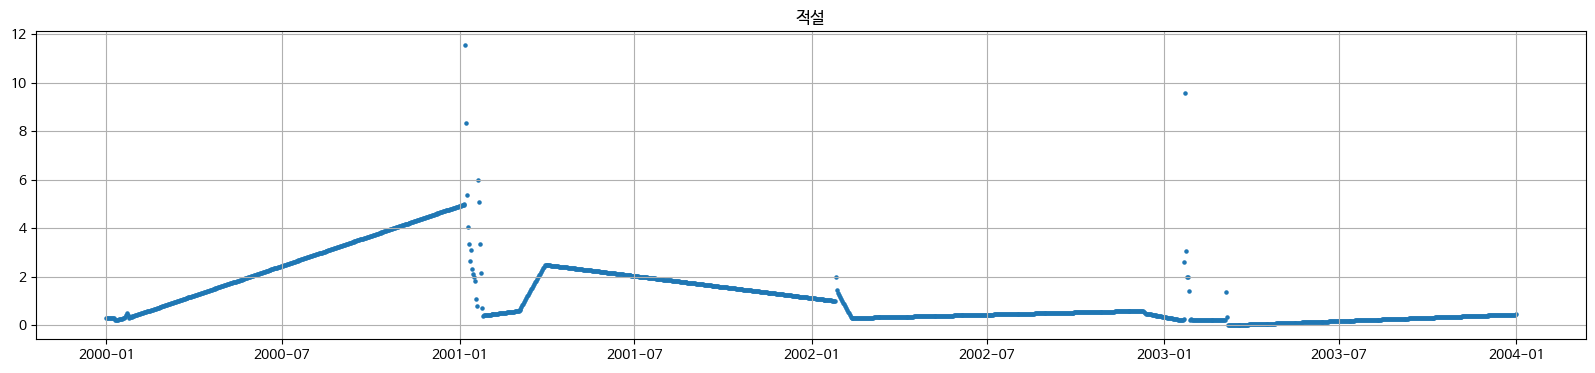

In [ ]:
plt.scatter(df[df.date<'2004-01-01'].date, df[df.date<'2004-01-01']['적설(cm)'], s=5)

plt.title('적설')
plt.show()

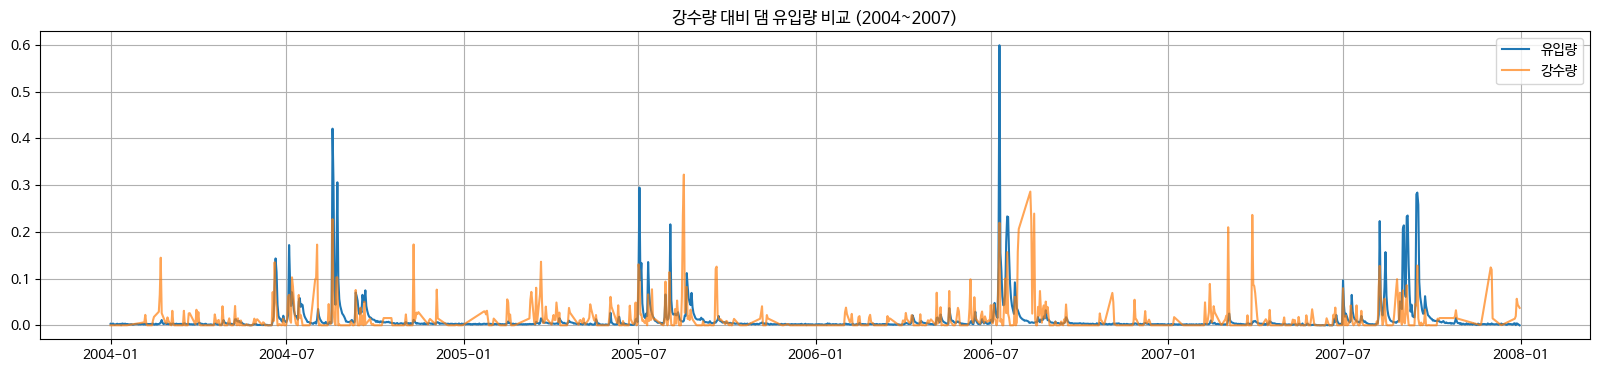

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2004-01-01')&(df_scaled.index<'2008-01-01')]['당일유입량'])
plt.plot(df_scaled[(df_scaled.index>='2004-01-01')&(df_scaled.index<'2008-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['유입량','강수량'])
plt.title('강수량 대비 댐 유입량 비교 (2004~2007)')
plt.show()

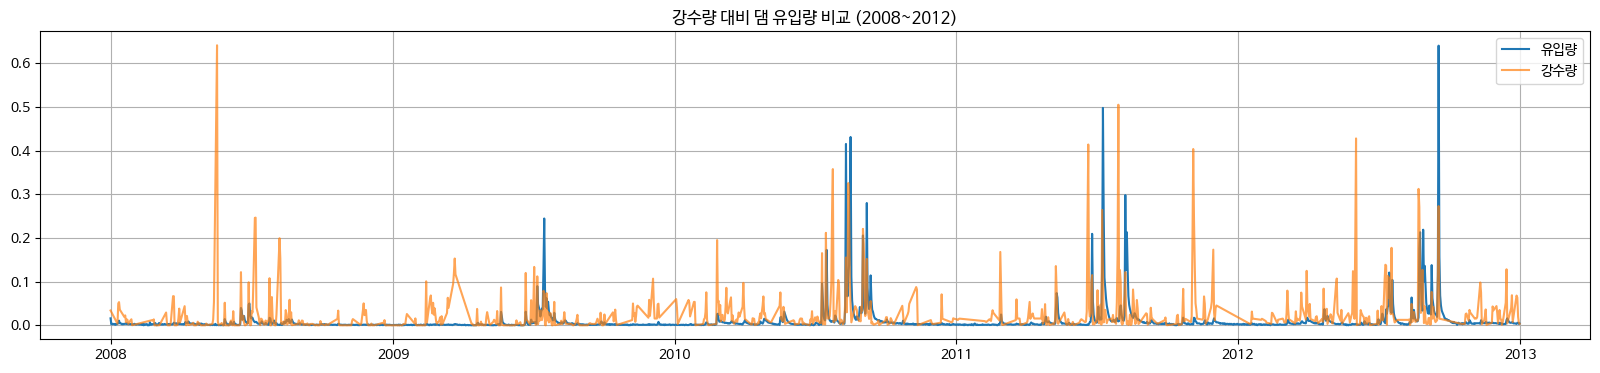

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2008-01-01')&(df_scaled.index<'2013-01-01')]['당일유입량'])
plt.plot(df_scaled[(df_scaled.index>='2008-01-01')&(df_scaled.index<'2013-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['유입량','강수량'])
plt.title('강수량 대비 댐 유입량 비교 (2008~2012)')
plt.show()

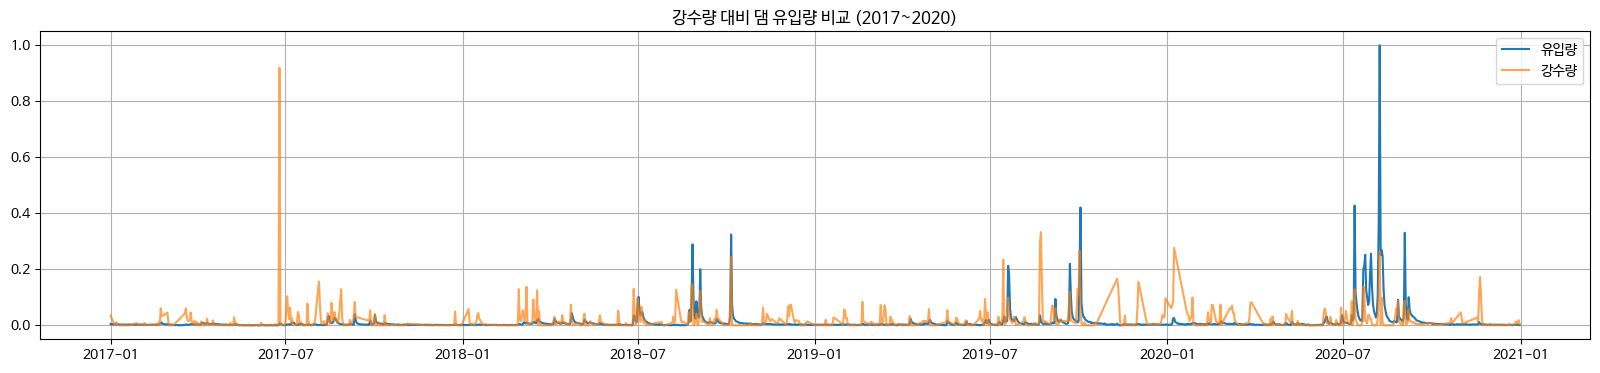

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2017-01-01')&(df_scaled.index<'2021-01-01')]['당일유입량'])
plt.plot(df_scaled[(df_scaled.index>='2017-01-01')&(df_scaled.index<'2021-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['유입량','강수량'])
plt.title('강수량 대비 댐 유입량 비교 (2017~2020)')
plt.show()

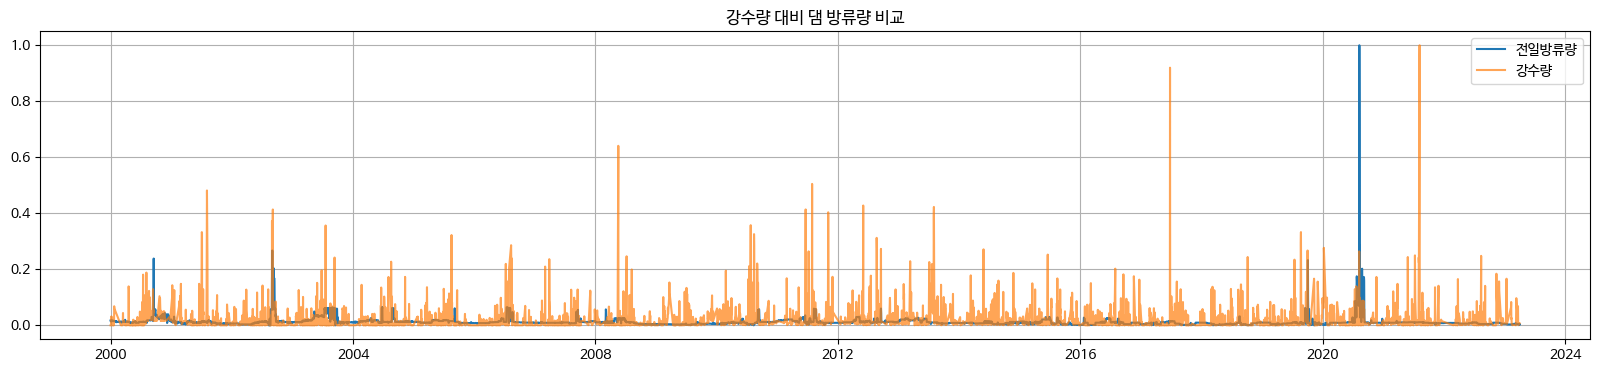

In [ ]:
plt.plot(df_scaled['전일방류량(본댐)'])
plt.plot(df_scaled['강수량(mm)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일방류량','강수량'])
plt.title('강수량 대비 댐 방류량 비교')
plt.show()

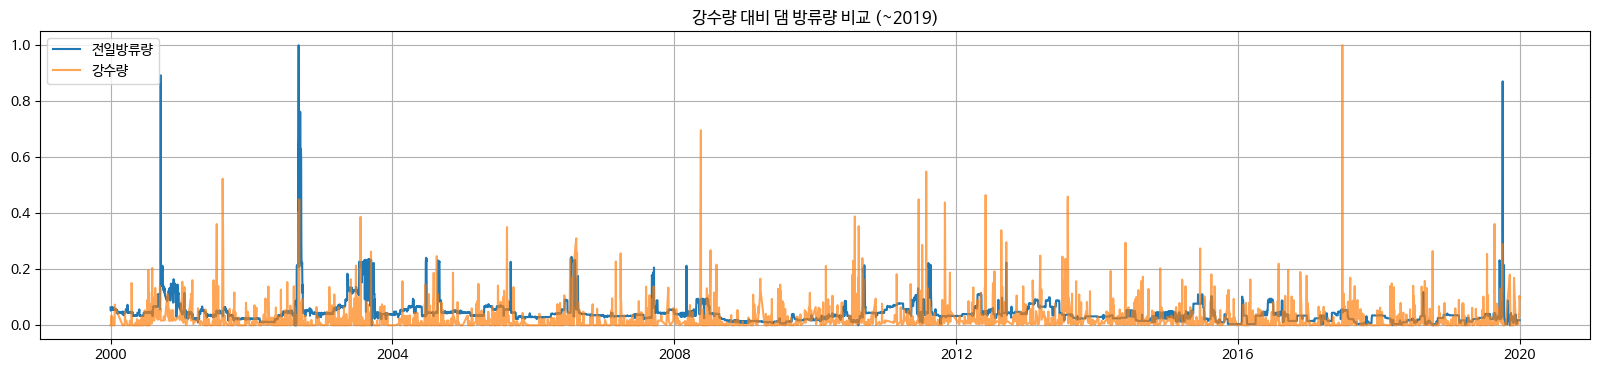

In [ ]:
plt.plot(scaled2019['전일방류량(본댐)'])
plt.plot(scaled2019['강수량(mm)'], alpha=0.7)

plt.legend(['전일방류량','강수량'])
plt.title('강수량 대비 댐 방류량 비교 (~2019)')
plt.show()

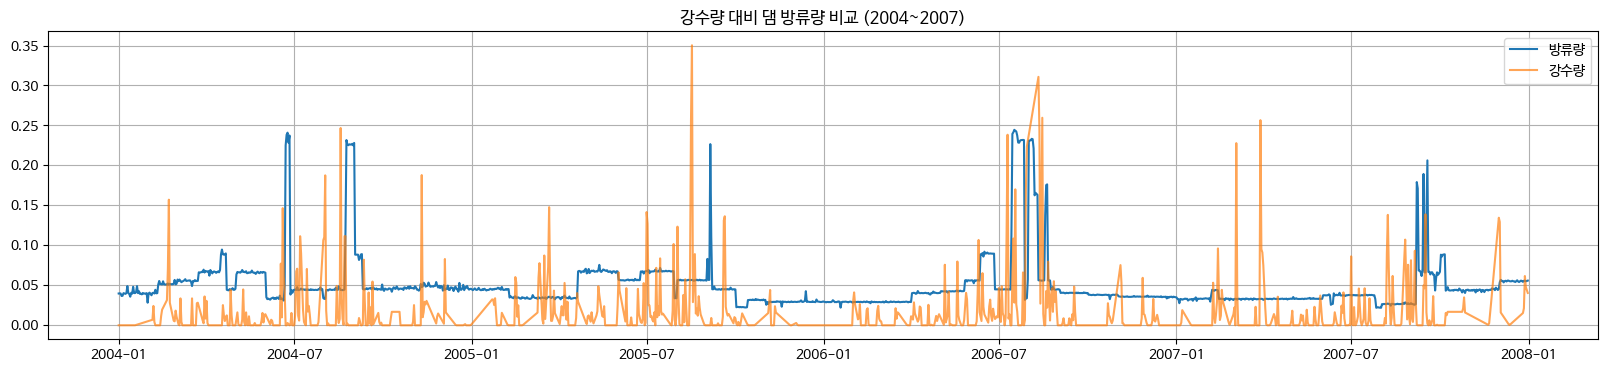

In [ ]:
plt.plot(scaled2019[(scaled2019.index>='2004-01-01')&(scaled2019.index<'2008-01-01')]['전일방류량(본댐)'])
plt.plot(scaled2019[(scaled2019.index>='2004-01-01')&(scaled2019.index<'2008-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['방류량','강수량'])
plt.title('강수량 대비 댐 방류량 비교 (2004~2007)')
plt.show()

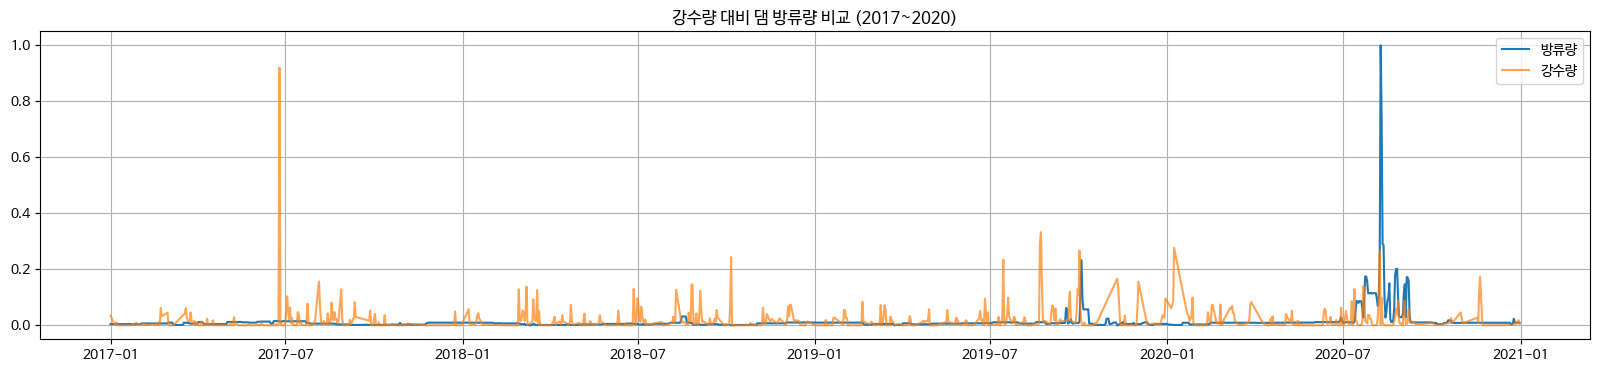

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2017-01-01')&(df_scaled.index<'2021-01-01')]['전일방류량(본댐)'])
plt.plot(df_scaled[(df_scaled.index>='2017-01-01')&(df_scaled.index<'2021-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['방류량','강수량'])
plt.title('강수량 대비 댐 방류량 비교 (2017~2020)')
plt.show()

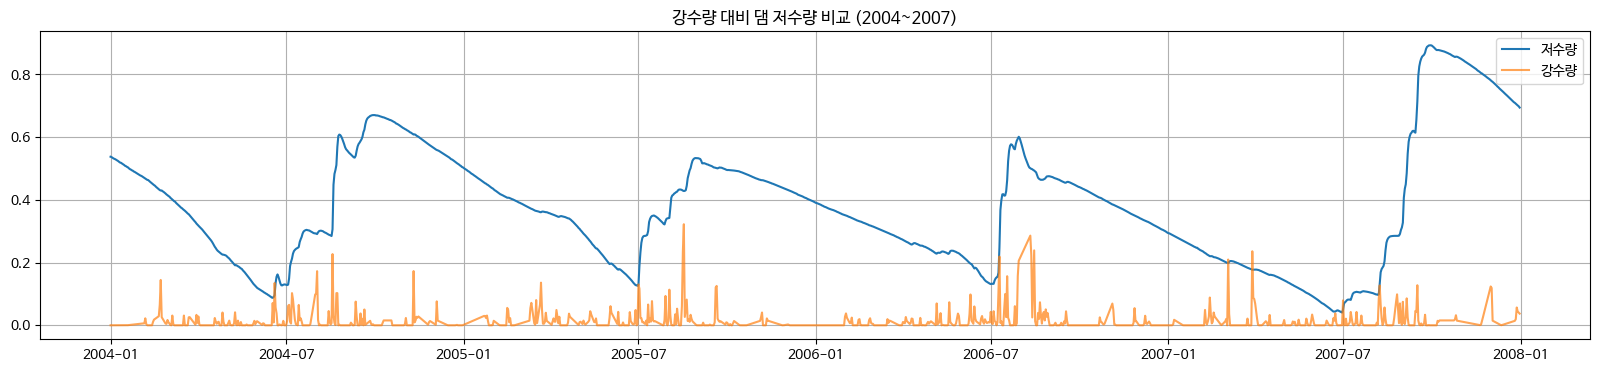

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2004-01-01')&(df_scaled.index<'2008-01-01')]['저수량(현재)'])
plt.plot(df_scaled[(df_scaled.index>='2004-01-01')&(df_scaled.index<'2008-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['저수량','강수량'])
plt.title('강수량 대비 댐 저수량 비교 (2004~2007)')
plt.show()

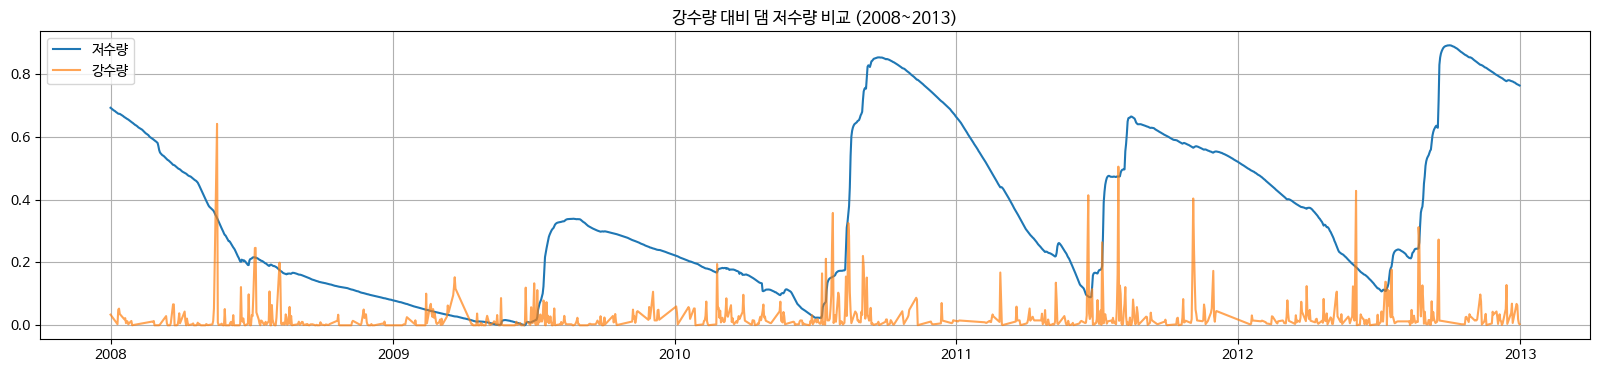

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2008-01-01')&(df_scaled.index<'2013-01-01')]['저수량(현재)'])
plt.plot(df_scaled[(df_scaled.index>='2008-01-01')&(df_scaled.index<'2013-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['저수량','강수량'])
plt.title('강수량 대비 댐 저수량 비교 (2008~2013)')
plt.show()

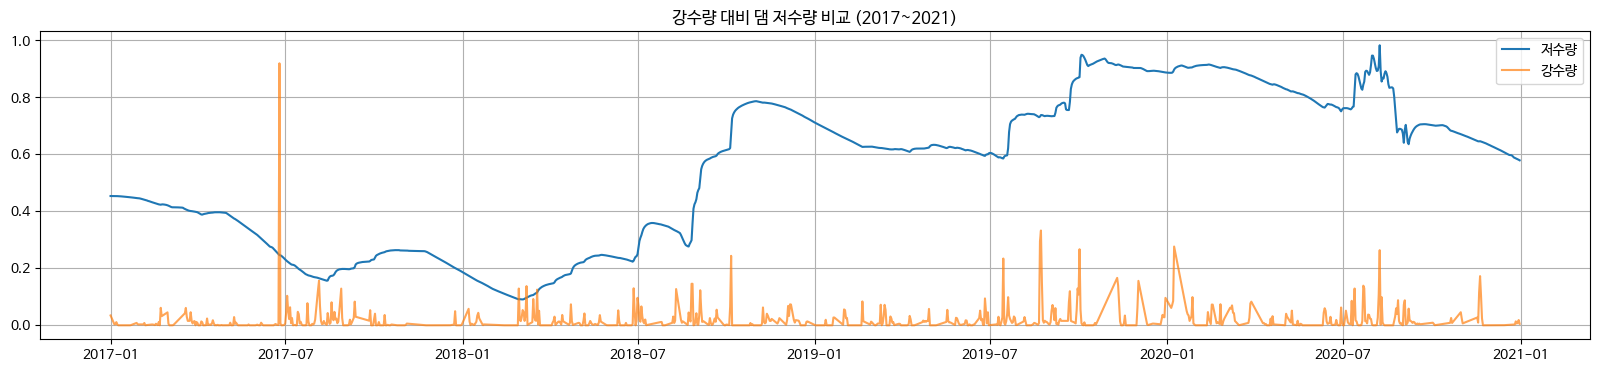

In [ ]:
plt.plot(df_scaled[(df_scaled.index>='2017-01-01')&(df_scaled.index<'2021-01-01')]['저수량(현재)'])
plt.plot(df_scaled[(df_scaled.index>='2017-01-01')&(df_scaled.index<'2021-01-01')]['강수량(mm)'], alpha=0.7)

plt.legend(['저수량','강수량'])
plt.title('강수량 대비 댐 저수량 비교 (2017~2021)')
plt.show()

In [ ]:
plt.plot(df_scaled['전일유입량'])
plt.plot(df_scaled['누계강수량'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일유입량','누계강수량'])
plt.title('예년저수량과의 차이 대비 댐 유입량 비교')
plt.show()

- 2020년 방류량 때문인지 이건 잘 안 보인다 빼고 그리기?
- 가뭄이었던 기간동안은 방류량이 적음
- 2017년에도 가뭄이었나? 강수에 비해 유입도 방류도 적음
- 2019년에 방류?

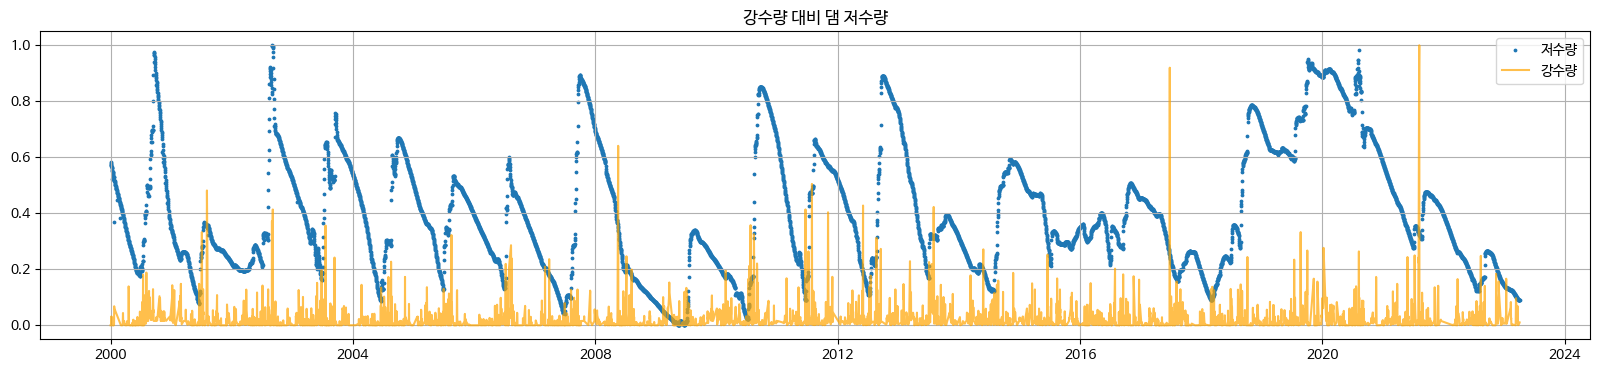

In [ ]:
plt.scatter(df_scaled.index, df_scaled['저수량(현재)'], s=3)
plt.plot(df_scaled['강수량(mm)'], color='orange', alpha=0.7)
plt.legend(['저수량','강수량'])
plt.title('강수량 대비 댐 저수량')
plt.show()

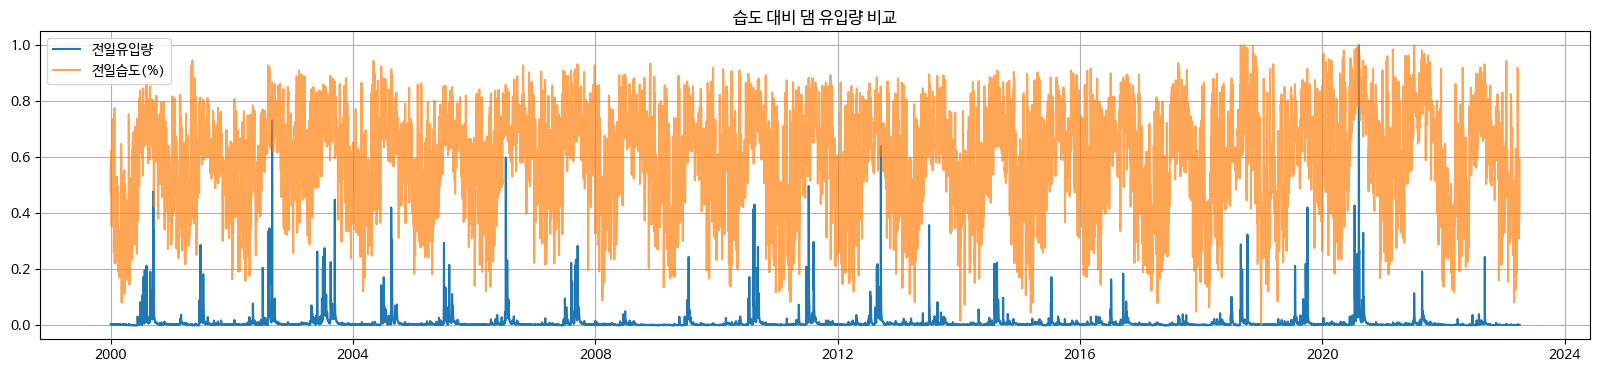

In [ ]:
plt.plot(df_scaled['전일유입량'])
plt.plot(df_scaled['1일전평균습도(%)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일유입량','전일습도(%)'])
plt.title('습도 대비 댐 유입량 비교')
plt.show()

In [ ]:
df.columns

Index(['date', '전일유입량', '저수위(현재)', '저수량(현재)', '저수위(예년)', '저수량(예년)', '현재저수율',
       '당일유입량', '홍수기', '저수위변화', '저수량변화', '강우변화', 'sin_day_of_week',
       'cos_day_of_week', 'sin_month', 'cos_month', 'sin_week_of_year',
       'cos_week_of_year', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)',
       '최저운고(100m )', '시정(10m)', '지면온도(°C)', '1일후강수량', '2일후강수량'],
      dtype='object')

<Axes: >

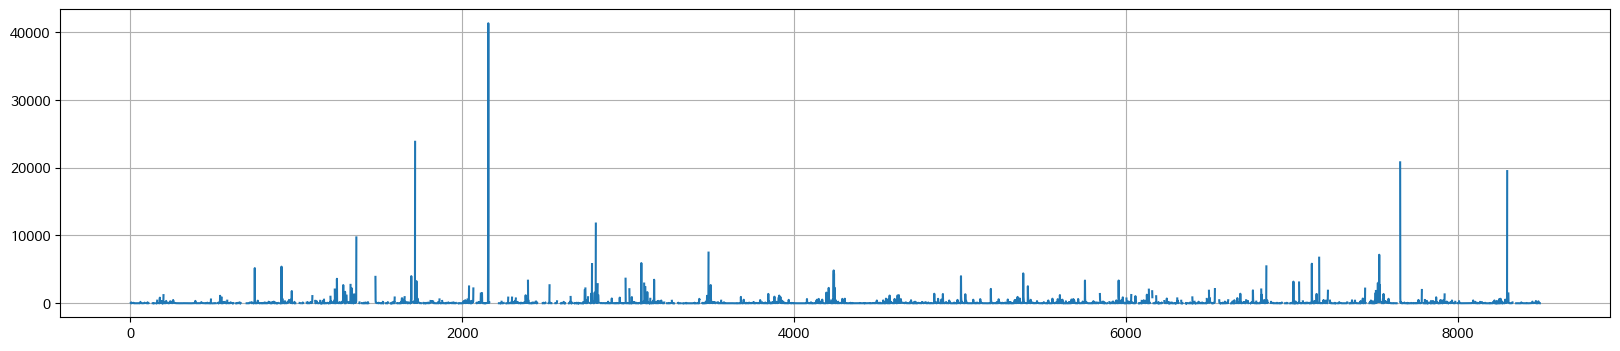

In [ ]:
test = df['당일유입량']/df['강수량(mm)']
test.plot()

In [ ]:
df.groupby('홍수기').std()

<ipython-input-36-62233e0dd8fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('홍수기').std()


,전일유입량,저수위(현재),저수량(현재),저수위(예년),저수량(예년),현재저수율,당일유입량,저수위변화,저수량변화,강우변화,...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),최저운고(100m ),시정(10m),지면온도(°C),1일후강수량,2일후강수량
홍수기,,,,,,,,,,,,,,,,,,,,,
0.0,19.351426,8.212956,134.661147,5.123912,78.494690,17.045637,19.532596,7.547159,123.900492,215.922335,...,9.027820,6.812735,6.911889,0.163976,0.725711,12.793681,700.097161,9.508822,0.965164,0.965423
1.0,120.546854,7.966247,130.318949,4.969319,77.000695,16.495770,120.426431,7.161372,118.644788,237.122419,...,2.938851,4.625837,4.652178,0.173644,0.654894,7.815406,591.827155,4.500932,2.172063,2.171968


In [ ]:
df.groupby('홍수기').mean()

<ipython-input-41-23eeeb65d4ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('홍수기').mean()


,전일유입량,저수위(현재),저수량(현재),저수위(예년),저수량(예년),현재저수율,당일유입량,저수위변화,저수량변화,강우변화,...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),최저운고(100m ),시정(10m),지면온도(°C),1일후강수량,2일후강수량
홍수기,,,,,,,,,,,,,,,,,,,,,
0.0,8.455743,159.603698,405.061039,156.752109,355.310518,51.273295,8.427604,2.851589,49.750521,-26.141522,...,1.679768,1014.936447,1018.824146,0.277110,0.624764,15.510892,1142.344553,12.124799,0.516386,0.516810
1.0,55.349764,158.393180,384.315877,158.116711,376.180624,48.647052,55.432656,0.276469,8.135253,-64.909544,...,19.823054,1005.145511,1008.790800,0.204747,0.647876,12.623868,1078.648577,28.611483,1.013094,1.011911


In [ ]:
df.std()

date                2452 days 10:33:01.587118592
전일유입량                                  65.657432
저수위(현재)                                 8.168533
저수량(현재)                               133.886137
저수위(예년)                                 5.119687
저수량(예년)                                78.640476
현재저수율                                  16.947489
당일유입량                                  65.657541
홍수기                                      0.43251
저수위변화                                   7.535281
저수량변화                                 123.919646
강우변화                                   222.01273
sin_day_of_week                         0.707163
cos_day_of_week                         0.707134
sin_month                               0.705958
cos_month                               0.708321
sin_week_of_year                        0.706262
cos_week_of_year                        0.707922
기온(°C)                                  9.526846
강수량(mm)                                 1.385791
풍속(m/s)             

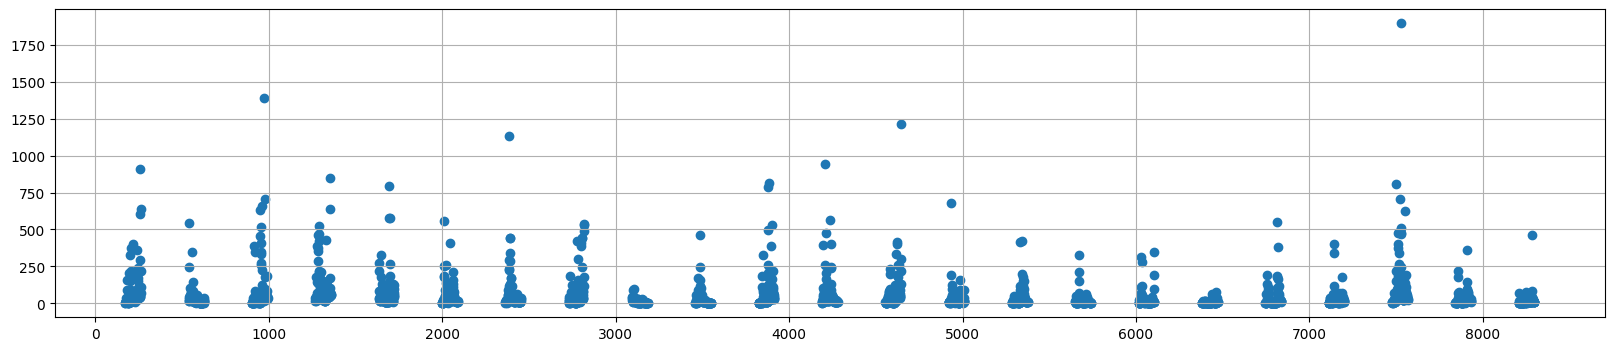

In [ ]:
plt.scatter(df[df['홍수기']==1].index, df[df['홍수기']==1]['전일유입량'])
plt.show()

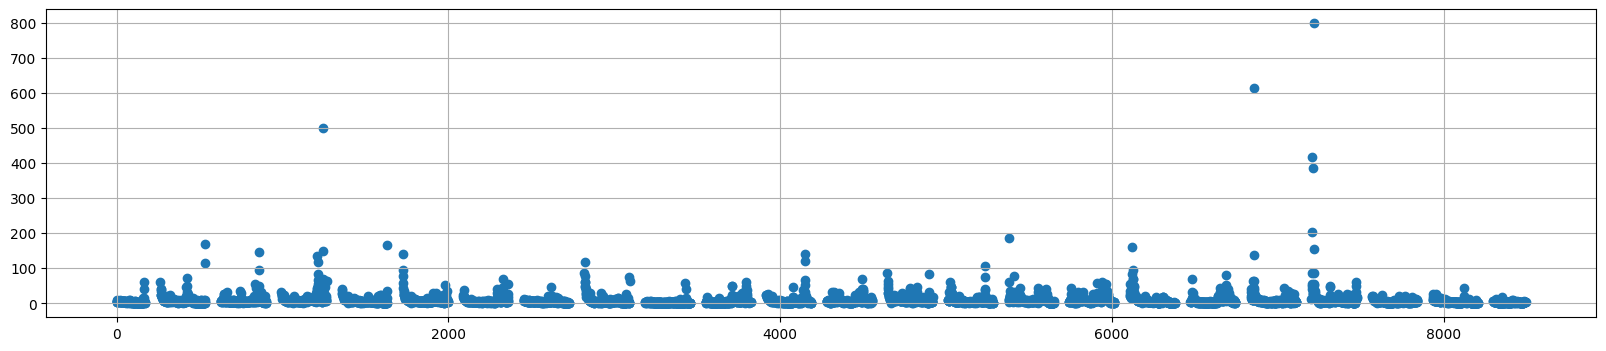

In [ ]:
plt.scatter(df[df['홍수기']==0].index, df[df['홍수기']==0]['전일유입량'])
plt.show()

In [ ]:
import numpy as np

<Axes: >

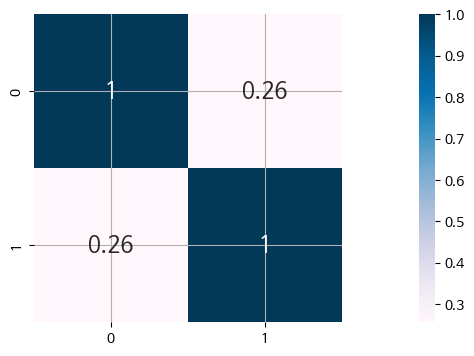

In [ ]:
colormap = plt.cm.PuBu
sns.heatmap(np.corrcoef(df['당일유입량'], df['강수량(mm)']), vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [ ]:
vmax = 1.0, vmax = 1.0, np.corrcoef(df[df['홍수기']==1]['당일유입량'], df[df['홍수기']==1]['강수량(mm)'])

array([[1.        , 0.24667923],
       [0.24667923, 1.        ]])

In [ ]:
np.corrcoef(df[df['홍수기']==0]['당일유입량'], df[df['홍수기']==0]['강수량(mm)'])

array([[1.        , 0.19472971],
       [0.19472971, 1.        ]])